# Международный интернет-магазин компьютерных игр. Исследование данных по продажам

В проекте представлена статистика продаж международного интернет-магазина компьютерных игр. Также доступны данные оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation)

**Цель исследования** — выявить закономерности в данных, определяющие успешность игры . В дальнейшем, результаты исследования позволят сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Ход исследования:** 

    1. Загрузка данных и необходимых библиотек
    2. Подготовка данных
    3. Исследовательский анализ данных
    4. Портрет пользователя каждого региона
    5. Проверка гипотез
    6. Общий вывод
    
    
**Описание данных**

	• Name — название игры
	• Platform — платформа
	• Year_of_Release — год выпуска
	• Genre — жанр игры
	• NA_sales — продажи в Северной Америке (миллионы проданных копий)
	• EU_sales — продажи в Европе (миллионы проданных копий)
	• JP_sales — продажи в Японии (миллионы проданных копий)
	• Other_sales — продажи в других странах (миллионы проданных копий)
	• Critic_Score — оценка критиков (максимум 100)
	• User_Score — оценка пользователей (максимум 10)
	• Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Загрузка данных и необходимых библиотек

In [1]:
# ипортируем нужные библиотеки
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import plotly.express as px

In [2]:
import seaborn as sns

In [3]:
#настройка, чтобы можно было просматривать все столбцы датафрейма
pd.options.display.max_columns = 100

In [4]:
# base_dataset = pd.read_csv('/datasets/games.csv', sep=',')
base_dataset = pd.read_csv('games.csv', sep=',')

In [5]:
# Смотрим первые строки датасета для ознакомления
base_dataset.head()

Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

In [6]:
# смотрим размеры датасета
base_dataset.shape

(16715, 11)

In [7]:
# смотрим основные данные о полях датасета
base_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Подготовка данных

#### Названия столбцов

Приведем в порядок названия столбцов (к нижнему регистру).

In [8]:
# Смотрим перечень столбцов
base_dataset.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [9]:
# Переведем названия в нижний регистр
base_dataset.columns = base_dataset.columns.str.lower()

In [10]:
# Проверяем
base_dataset.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Типы данных

In [11]:
base_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Преобразуем данные в нужные типы

Год year_of_release - необходимо преобразовать в целое число (integer)

In [12]:
base_dataset['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [13]:
print('Количество пустых строк в поле year_of_release:', base_dataset['year_of_release'].isna().sum())

Количество пустых строк в поле year_of_release: 269


In [14]:
print('Доля пустых строк в поле year_of_release:', base_dataset['year_of_release'].isna().sum() / base_dataset.shape[0])

Доля пустых строк в поле year_of_release: 0.01609332934489979


Ввиду того что доля пустых строк в поле year_of_release составляе 1,6% принято решение строки удалить 

In [15]:
base_dataset = base_dataset.dropna(subset=['year_of_release']).reset_index(drop=True)

In [16]:
# смотрим удаленные пропуски
print('Количество пустых строк в поле year_of_release:', base_dataset['year_of_release'].isna().sum())

Количество пустых строк в поле year_of_release: 0


Почему удаляем год релиза. В реальности все зависит от поставленной задачи на исследование. В данном проекте необходимо определить актуальный период, на основании которого мы и будем делать прогнозы на 2017 год. Соответственно, мы все равно будем сокращать датасет, фильтруя по году релиза. А можно провести анализ, сколько пропусков года релиза приходится на платформы, которые например к 2000 году уже вышли с рынка, то есть для прогноза на 2017 год мы их явно учитывать не будем.

In [17]:
#меняем тип данных
base_dataset['year_of_release'] = base_dataset['year_of_release'].astype('int')

In [18]:
# посмотрим уникальные значения, что получилось
np.sort(base_dataset['year_of_release'].unique())


array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016])

Полю critic_score - необходимо присвоить тип целое число (integer)

In [19]:
base_dataset['critic_score'].isna().sum()

8463

Количество пропусков в поле critic_score значительно. Их так просто не удалить без последствий. Поэтому принимаем решение оставить пропуски и не менять тип данных этого поля

In [20]:
base_dataset['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Полю user_score  - необходимо присвоить тип float - вещественные числа

In [21]:
# смотрим уникальные значения
base_dataset['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

'tbd' - to be determined, то есть будет определено. Заменяем на None

In [22]:
#  'tbd' - to be determined, то есть будет определено. Заменяем на None
base_dataset.loc[(base_dataset['user_score'] == 'tbd'), 'user_score'] = None

In [23]:
# присваиваем тип float
base_dataset['user_score'] = base_dataset['user_score'].astype('float')

In [24]:
# смотрим уникальные значения
base_dataset['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [25]:
base_dataset.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  
0     28.96      3.77         8.45          76.0         8.0      E  
1      3.58      6.81         0.77           NaN         NaN    NaN  
2     12.76      3.79         3.29          82.0         8.3      E  
3     10.93      3.28         2.95          80.0         8.0      E  
4      8.89     10.22         1.00           NaN         NaN    NaN

In [26]:
base_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


#### Обработка пропусков в данных

In [27]:
base_dataset.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating             6678
dtype: int64

 Проще поставить на пропуски заглушку в виде отрицательной цифры, а потом при анализе по отзывам критиков заглушку отфильтровывать или оставить пропуски. Пропуски нам не будут мешать при анализе отзывов, но при проверке гипотез их надо будет отфильтровать.

Обработаем пропуски для поля critic_score поставим заглушку в виде отрицательного числа

In [28]:
base_dataset['critic_score'] = base_dataset['critic_score'].fillna(-100)

Теперь можем поменять тип данных

In [29]:
base_dataset['critic_score'].unique()

array([  76., -100.,   82.,   80.,   89.,   58.,   87.,   91.,   61.,
         97.,   95.,   77.,   88.,   83.,   94.,   93.,   85.,   86.,
         98.,   96.,   90.,   84.,   73.,   74.,   78.,   92.,   71.,
         72.,   68.,   62.,   49.,   67.,   81.,   66.,   56.,   79.,
         70.,   59.,   64.,   75.,   60.,   63.,   69.,   50.,   25.,
         42.,   44.,   55.,   48.,   57.,   29.,   47.,   65.,   54.,
         20.,   53.,   37.,   38.,   33.,   52.,   30.,   32.,   43.,
         45.,   51.,   40.,   46.,   39.,   34.,   41.,   36.,   31.,
         27.,   35.,   26.,   19.,   28.,   23.,   24.,   21.,   17.,
         13.])

In [30]:
base_dataset['critic_score'] = base_dataset['critic_score'].astype('int')

Отработаем пропуски в поле name

In [31]:
# смотрим пропуски
base_dataset['name'].isna().sum()

2

Поскольку пропусков всего два, принчто решение их удалить

In [32]:
base_dataset = base_dataset.dropna(subset=['name']).reset_index(drop=True)

In [33]:
# проверяем пропуски
base_dataset['name'].isna().sum()

0

In [34]:
#  проверим отсутствие пропусков
base_dataset['genre'].isna().sum()

0

Отработаем пропуски в user_score. Заполним их заглушкой отрицательным числом

In [35]:
base_dataset['user_score'] = base_dataset['user_score'].fillna(-100)

In [36]:
# Комментарий ревьюера
# Эта игра выходила с разными оценками.
base_dataset.query('name == "Need for Speed: Most Wanted"')

name platform  year_of_release   genre  \
252    Need for Speed: Most Wanted      PS2             2005  Racing   
519    Need for Speed: Most Wanted      PS3             2012  Racing   
1177   Need for Speed: Most Wanted     X360             2012  Racing   
1574   Need for Speed: Most Wanted     X360             2005  Racing   
1976   Need for Speed: Most Wanted       XB             2005  Racing   
2025   Need for Speed: Most Wanted      PSV             2012  Racing   
3531   Need for Speed: Most Wanted       GC             2005  Racing   
5883   Need for Speed: Most Wanted       PC             2005  Racing   
6177   Need for Speed: Most Wanted     WiiU             2013  Racing   
6310   Need for Speed: Most Wanted       DS             2005  Racing   
6373   Need for Speed: Most Wanted      GBA             2005  Racing   
11534  Need for Speed: Most Wanted       PC             2012  Racing   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
252        2.03      1.79      0.08         0.47            82         9.1   
519        0.71      1.46      0.06         0.58          -100      -100.0   
1177       0.62      0.78      0.01         0.15            83         8.5   
1574       1.00      0.13      0.02         0.10            83         8.5   
1976       0.53      0.46      0.00         0.05            83         8.8   
2025       0.33      0.45      0.01         0.22          -100      -100.0   
3531       0.43      0.11      0.00         0.02            80         9.1   
5883       0.02      0.23      0.00         0.04            82         8.5   
6177       0.13      0.12      0.00         0.02          -100      -100.0   
6310       0.24      0.01      0.00         0.02            45         6.1   
6373       0.19      0.07      0.00         0.00          -100         8.3   
11534      0.00      0.06      0.00         0.02            82         8.5   

      rating  
252        T  
519      NaN  
1177       T  
1574       T  
1976       T  
2025     NaN  
3531       T  
5883       T  
6177     NaN  
6310       E  
6373       E  
11534      T

Отработаем пропуски в rating. Поставим заглушку no_rating. Т.к. никаким аналогом рейтинг заменить нельзя

In [37]:
base_dataset['rating'] = base_dataset['rating'].fillna('no_rating')

In [38]:
base_dataset.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Все пропуски отработаны

In [39]:
base_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int32  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(5), int32(2), object(4)
memory usage: 1.3+ MB


#### Суммарные продажи во всех регионах

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [40]:
base_dataset['all_regions_sales'] = base_dataset[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

#### Проверка на дубликаты

In [41]:
base_dataset.duplicated().sum()

0

Явных дубликатов не обнаружено

In [42]:
# Посмотрим, что у нас осталось
temp = base_dataset.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,' : кол-во 0', temp[temp[col_l] == 0][col_l].count(),
        ', процент 0', round(temp[temp[col_l] == 0][col_l].count()/len(temp)*100, 2),'%')
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               16444 non-null  object 
 1   platform           16444 non-null  object 
 2   year_of_release    16444 non-null  int32  
 3   genre              16444 non-null  object 
 4   na_sales           16444 non-null  float64
 5   eu_sales           16444 non-null  float64
 6   jp_sales           16444 non-null  float64
 7   other_sales        16444 non-null  float64
 8   critic_score       16444 non-null  int32  
 9   user_score         16444 non-null  float64
 10  rating             16444 non-null  object 
 11  all_regions_sales  16444 non-null  float64
dtypes: float64(6), int32(2), object(4)
memory usage: 1.4+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shi

### Исследовательский анализ данных

#### Посмотрим, сколько игр выпускалось в разные годы.

In [43]:
base_dataset.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index().sort_values('year_of_release')

year_of_release  name
0              1980     9
1              1981    46
2              1982    36
3              1983    17
4              1984    14
5              1985    14
6              1986    21
7              1987    16
8              1988    15
9              1989    17
10             1990    16
11             1991    41
12             1992    43
13             1993    60
14             1994   121
15             1995   219
16             1996   263
17             1997   289
18             1998   379
19             1999   338
20             2000   350
21             2001   482
22             2002   829
23             2003   775
24             2004   762
25             2005   939
26             2006  1006
27             2007  1197
28             2008  1427
29             2009  1426
30             2010  1255
31             2011  1136
32             2012   653
33             2013   544
34             2014   581
35             2015   606
36             2016   502

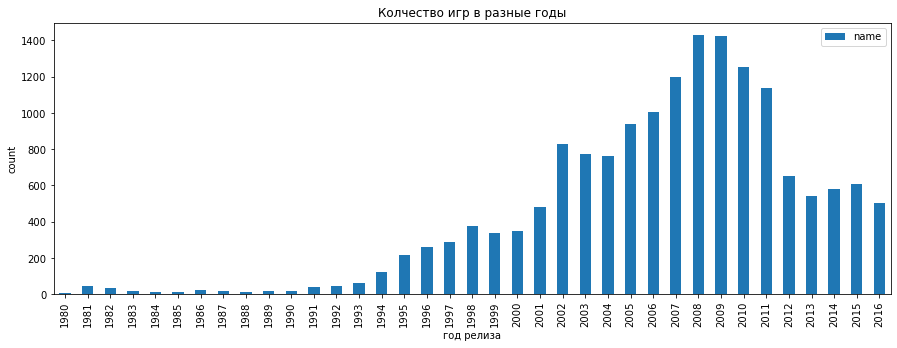

In [44]:
# Посмотрим на графике, сколько игр выпускалось в разные годы
base_dataset.pivot_table(index='year_of_release', values='name', aggfunc='count')\
.reset_index()\
.plot(x='year_of_release', y= 'name', kind='bar', figsize=(15,5), title='Колчество игр в разные годы')
plt.ylabel('count')
plt.xlabel('год релиза')
plt.show()

#### Посмотрим, как менялись продажи по платформам

In [45]:
# посмотрим продажи по ТОП-10 платформ
base_dataset.pivot_table\
(index=('platform'),values='all_regions_sales', aggfunc='sum')\
.sort_values('all_regions_sales', ascending=False)\
.head(10)

all_regions_sales
platform                   
PS2                 1233.56
X360                 961.24
PS3                  931.34
Wii                  891.18
DS                   802.78
PS                   727.58
PS4                  314.14
GBA                  312.88
PSP                  289.53
3DS                  257.81

In [46]:
# сформируем список из 10 платформ с наибольшим общим оборотом ТОП-10
ten_biggest_platform = list(base_dataset.pivot_table\
(index=('platform'),values='all_regions_sales', aggfunc='sum')\
.sort_values('all_regions_sales', ascending=False).head(10).index)
ten_biggest_platform

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

In [47]:
condition_ten_biggest_platform = (\
(base_dataset['platform'] == ten_biggest_platform[0]) |\
(base_dataset['platform'] == ten_biggest_platform[1])|\
(base_dataset['platform'] == ten_biggest_platform[2])|\
(base_dataset['platform'] == ten_biggest_platform[3])|\
(base_dataset['platform'] == ten_biggest_platform[4])|\
(base_dataset['platform'] == ten_biggest_platform[5])|\
(base_dataset['platform'] == ten_biggest_platform[6])|\
(base_dataset['platform'] == ten_biggest_platform[7])|\
(base_dataset['platform'] == ten_biggest_platform[8])|\
(base_dataset['platform'] == ten_biggest_platform[9])\
                                 )

In [48]:
base_dataset[condition_ten_biggest_platform].tail(3)

name platform  year_of_release     genre  \
16439  Samurai Warriors: Sanada Maru      PS3             2016    Action   
16440               LMA Manager 2007     X360             2006    Sports   
16442               Spirits & Spells      GBA             2003  Platform   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
16439      0.00      0.00      0.01          0.0          -100      -100.0   
16440      0.00      0.01      0.00          0.0          -100      -100.0   
16442      0.01      0.00      0.00          0.0          -100      -100.0   

          rating  all_regions_sales  
16439  no_rating               0.01  
16440  no_rating               0.01  
16442  no_rating               0.01

In [49]:
base_dataset[condition_ten_biggest_platform].pivot_table\
(index=('platform','year_of_release'),values='all_regions_sales', aggfunc='sum').reset_index()\
.head(10)

platform  year_of_release  all_regions_sales
0      3DS             2011              63.20
1      3DS             2012              51.36
2      3DS             2013              56.57
3      3DS             2014              43.76
4      3DS             2015              27.78
5      3DS             2016              15.14
6       DS             1985               0.02
7       DS             2004              17.27
8       DS             2005             130.14
9       DS             2006             119.81

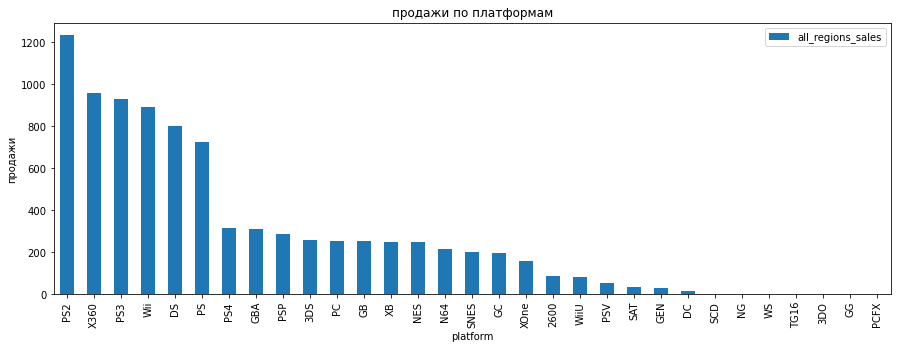

In [50]:
# визуализируем  на столбчатой диаграмме продажи по всем платформам
base_dataset.pivot_table\
(index=('platform'),values='all_regions_sales', aggfunc='sum')\
.sort_values('all_regions_sales', ascending=False)\
.reset_index()\
.plot(x=('platform'),y= 'all_regions_sales', kind='bar', figsize=(15,5), title='продажи по платформам')

plt.ylabel('продажи')
plt.show()

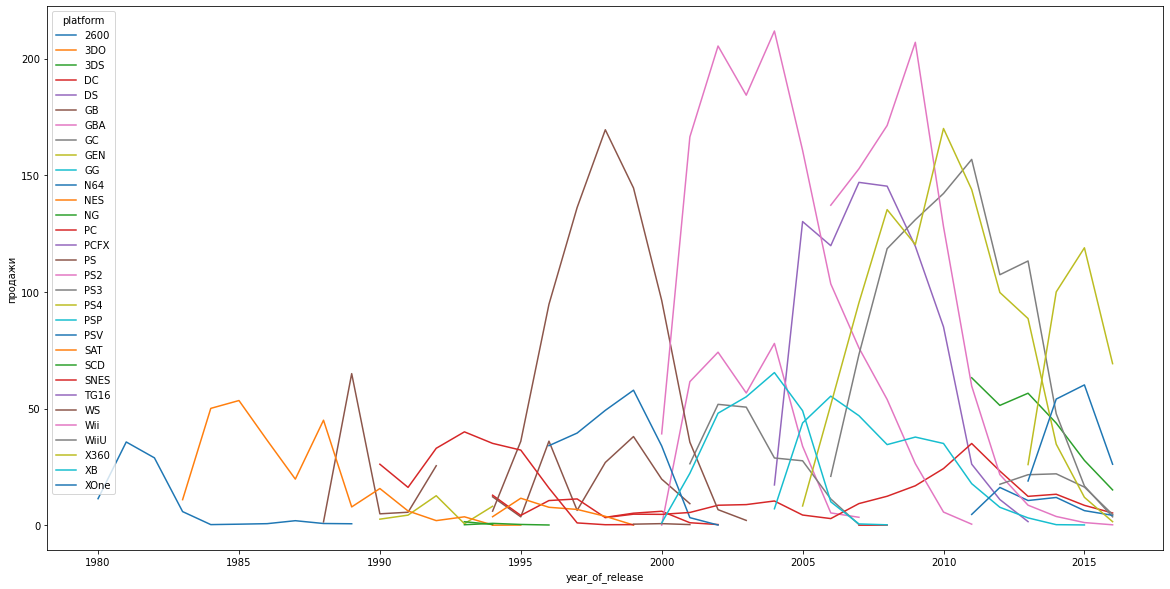

In [51]:
# визуализируем на графике продажи по всем платформам
base_dataset[(base_dataset['year_of_release'] != 0)]\
.pivot_table(index='year_of_release', columns='platform', values='all_regions_sales', aggfunc='sum')\
.plot(figsize=(20,10))
plt.ylabel('продажи')
plt.show()

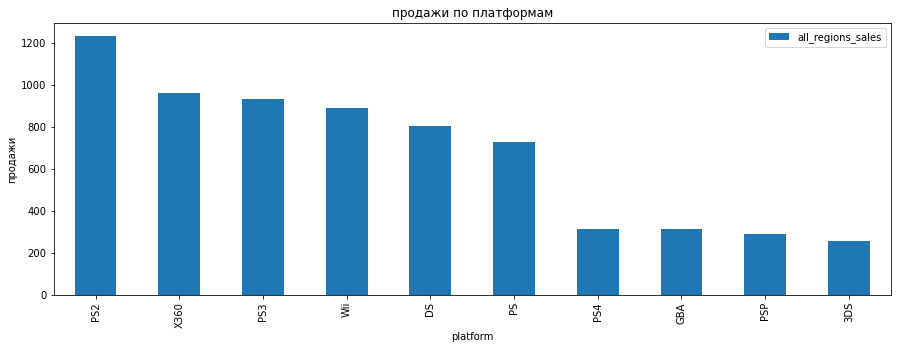

In [52]:
# визуализируем  на столбчатой диаграмме продажи по ТОП-10 платформам
base_dataset.pivot_table\
(index=('platform'),values='all_regions_sales', aggfunc='sum')\
.sort_values('all_regions_sales', ascending=False)\
.reset_index().head(10)\
.plot(x=('platform'),y= 'all_regions_sales', kind='bar', figsize=(15,5), title='продажи по платформам')
plt.ylabel('продажи')
plt.show()

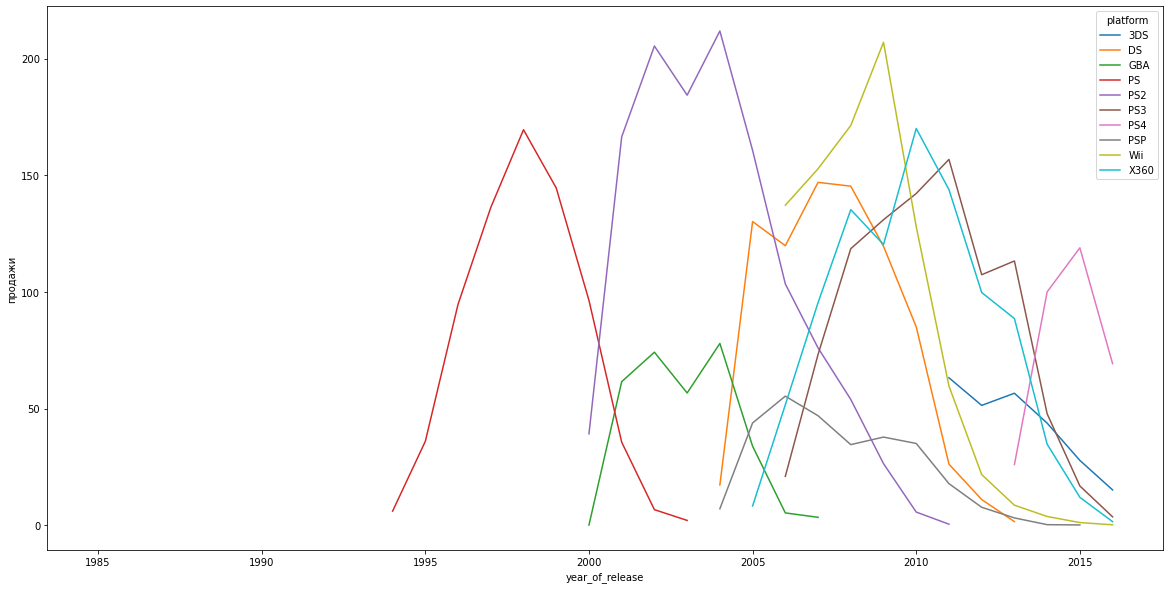

In [53]:
# визуализируем  на графике продажи по ТОП-10 платформам
base_dataset[(base_dataset['year_of_release'] != 0)&condition_ten_biggest_platform]\
.pivot_table(index='year_of_release', columns='platform', values='all_regions_sales', aggfunc='sum')\
.plot(figsize=(20,10))
plt.ylabel('продажи')
plt.show()

In [54]:
# построим таблицу для подсчёта количества лет работы десяти крупнейших  платформ
base_dataset[condition_ten_biggest_platform]\
.pivot_table(index=('platform','year_of_release'),values='all_regions_sales', aggfunc='sum').reset_index().query('year_of_release!=0')\
.pivot_table(index='platform', values='year_of_release', aggfunc='count')

year_of_release
platform                 
3DS                     6
DS                     11
GBA                     8
PS                     10
PS2                    12
PS3                    11
PS4                     4
PSP                    12
Wii                    11
X360                   12

In [55]:
# теперь посмотрим описание данных ТОП-10 по количеству лет
base_dataset[condition_ten_biggest_platform]\
.pivot_table(index=('platform','year_of_release'),values='all_regions_sales', aggfunc='sum').reset_index().query('year_of_release!=0')\
.pivot_table(index='platform', values='year_of_release', aggfunc='count')\
['year_of_release'].describe()

count    10.000000
mean      9.700000
std       2.790858
min       4.000000
25%       8.500000
50%      11.000000
75%      11.750000
max      12.000000
Name: year_of_release, dtype: float64

In [56]:
# посмотрим описание данных всех платформ по количеству лет
base_dataset\
.pivot_table(index=('platform','year_of_release'),values='all_regions_sales', aggfunc='sum').reset_index().query('year_of_release!=0')\
.pivot_table(index='platform', values='year_of_release', aggfunc='count')\
['year_of_release'].describe()

count    31.000000
mean      7.677419
std       5.081910
min       1.000000
25%       4.000000
50%       7.000000
75%      11.000000
max      26.000000
Name: year_of_release, dtype: float64

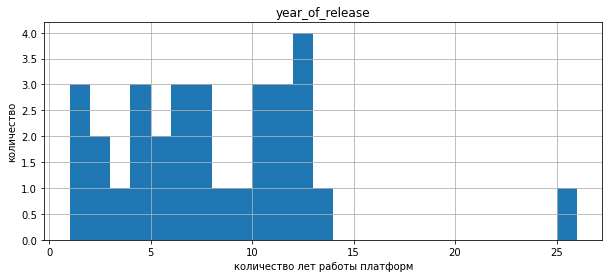

In [57]:
#Посмотрим на распределение времени работы по всем платформам
base_dataset\
.pivot_table(index=('platform','year_of_release'),values='all_regions_sales', aggfunc='sum').reset_index().query('year_of_release!=0')\
.pivot_table(index='platform', values='year_of_release', aggfunc='count').hist(figsize=(10,4), bins=25)
plt.ylabel('количество')
plt.xlabel('количество лет работы платформ')
plt.show()

Интересно, что мы имеем большой разброс по количеству лет работы крупнейщих платформ. От года до 13 лет. Но медианный срок существования платформ 7 лет

Бросается в глаза самая долгоживущая из платформ - РС. Она входит в десятку крупнейших, хотя её ежегодные продажи не превышают 50 млн. копий. Для других ТОП-10 платформ характерен резкий рост в течение 3-5 лет, плато 2-4 лет, далее резкое падение

#### Динмика рынка по годам

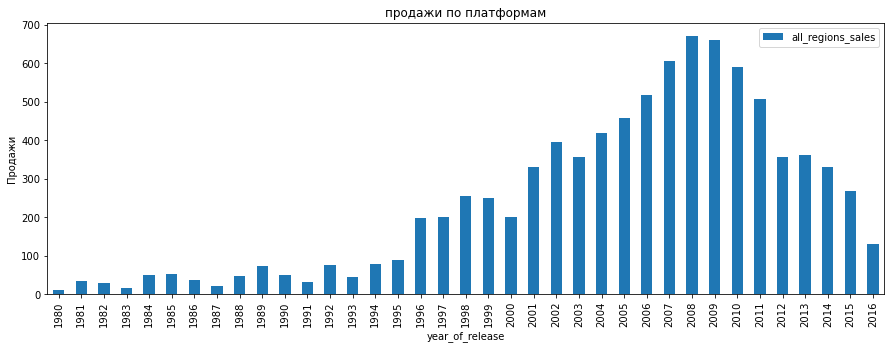

In [58]:
base_dataset\
.pivot_table(index=('year_of_release'),values='all_regions_sales', aggfunc='sum')\
.plot(y= 'all_regions_sales', kind='bar', figsize=(15,5), title='продажи по платформам')
plt.ylabel('Продажи')
plt.show()

Начиная с 1996 года можно отметить начало периода ощутимого роста рынка. Это связано с приходом крупной платформы PS - первой за всю историю платформы, продажи которой на пике в 1998 году превысили 150 млн. копий. Вместе с тем, начиная с 2009 года, можно отметить начало периода падения рынка. Возможно это связано с ростом популярности соцсетей или с иной причиной.

#### Возьмём данные за актуальный период

Для прогнозирования продаж 2017 года берем самые актуальные данные за последние 3 года. Т.е. с 2014-го остальное не берем


Для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватим уже отжившие тренды. Но и очень короткий период не подходит для прогнозирования, так что надо выбирать золотую середину (но не менее 2-х полных лет и не более 5 лет).

In [59]:
#сформируем датасет actual_data на основе изложенных тезисов
actual_data = base_dataset[(base_dataset['year_of_release']>=2014)]

Сразу сформируем перечень платформ для актуального периода

In [60]:
actual_platform = list(actual_data['platform'].unique())
actual_platform

['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV', 'PSP']

In [61]:
# сформируем список из 10 платформ с наибольшим общим оборотом ТОП-10
list(base_dataset.pivot_table\
(index=('platform'),values='all_regions_sales', aggfunc='sum')\
.sort_values('all_regions_sales', ascending=False).head(10).index)


['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

#### Потенциально прибыльные платформы

Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

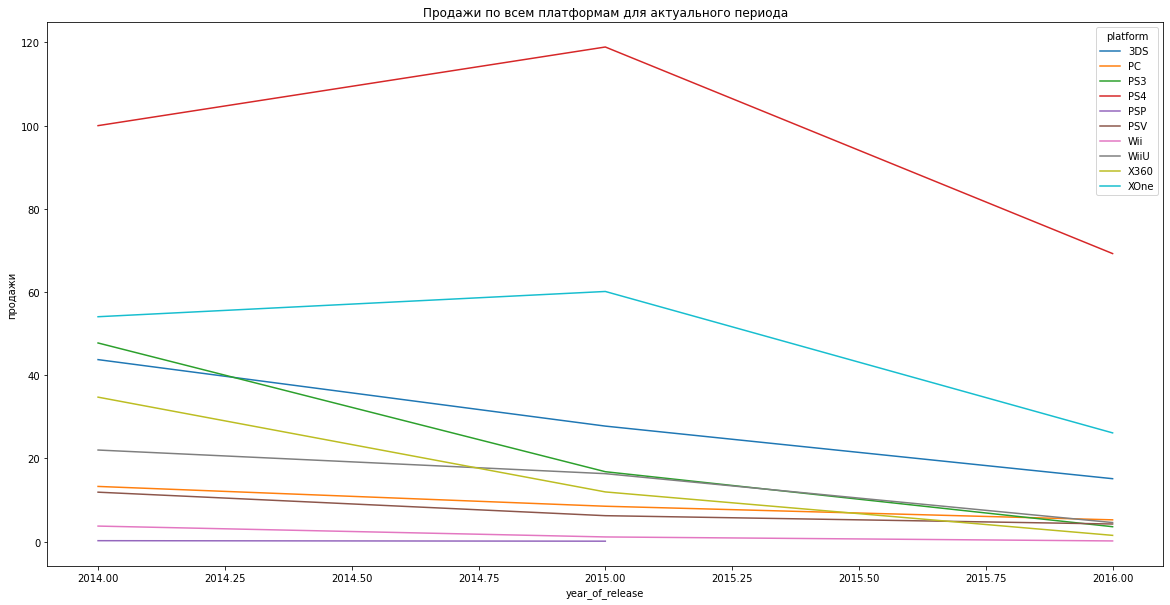

In [62]:
# визуализируем на графике продажи по всем платформам для актуального периода
actual_data\
.pivot_table(index='year_of_release', columns='platform', values='all_regions_sales', aggfunc='sum')\
.plot(figsize=(20,10), title='Продажи по всем платформам для актуального периода')
plt.ylabel('продажи')
plt.show()

Не смотря на падение рынка в 2016 году две платформы PS4 и XOne занимают бОльшую долю рынка. Для планированя продаж 2017 года эти платформы наиболее перспективны

Рассмотрим данные платформы с точки зрени локаций

In [63]:
actual_data[(actual_data['platform'] =='PS4')|(actual_data['platform'] == 'XOne')]\
.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc=['sum', 'mean'])

sum                                    mean            \
             eu_sales jp_sales na_sales other_sales  eu_sales  jp_sales   
genre                                                                     
Action          51.54     5.87    48.56       16.71  0.231121  0.026323   
Adventure        4.17     0.48     3.22        1.15  0.099286  0.011429   
Fighting         3.11     0.76     4.64        1.39  0.141364  0.034545   
Misc             5.03     0.43     7.25        1.80  0.139722  0.011944   
Platform         3.01     0.07     2.05        0.91  0.231538  0.005385   
Puzzle           0.02     0.00     0.00        0.00  0.020000  0.000000   
Racing          10.15     0.27     4.57        2.06  0.281944  0.007500   
Role-Playing    15.39     3.56    15.49        5.10  0.236769  0.054769   
Shooter         51.30     2.67    62.37       17.51  0.693243  0.036081   
Simulation       0.84     0.18     0.35        0.19  0.093333  0.020000   
Sports          31.53     0.89    31.15       10.12  0.414868  0.011711   
Strategy         0.20     0.16     0.23        0.06  0.028571  0.022857   

                                    
              na_sales other_sales  
genre                               
Action        0.217758    0.074933  
Adventure     0.076667    0.027381  
Fighting      0.210909    0.063182  
Misc          0.201389    0.050000  
Platform      0.157692    0.070000  
Puzzle        0.000000    0.000000  
Racing        0.126944    0.057222  
Role-Playing  0.238308    0.078462  
Shooter       0.842838    0.236622  
Simulation    0.038889    0.021111  
Sports        0.409868    0.133158  
Strategy      0.032857    0.008571

В рамках выбранных платформ, на американском рынке определенно стоит обратить внимание на жанры Shooter,Action, Sports. На рынке Европы лидируют сегменты Action, Shooter, Sports. 

Рассмотрим в сравнении рынки по локациям

In [64]:
#разбивка платформ по локациям
actual_data.pivot_table(index='platform', values=['eu_sales', 'jp_sales', 'na_sales', 'other_sales'], aggfunc='sum')

eu_sales  jp_sales  na_sales  other_sales
platform                                           
3DS          16.12     44.24     22.64         3.68
PC           17.97      0.00      7.23         1.85
PS3          25.54     11.22     22.05         9.37
PS4         130.04     15.02     98.61        44.48
PSP           0.00      0.36      0.00         0.00
PSV           3.53     14.54      2.52         1.81
Wii           2.59      0.00      2.08         0.40
WiiU         13.15      7.31     19.36         3.16
X360         15.49      0.08     28.30         4.35
XOne         46.25      0.32     81.27        12.52

In [65]:
#разбивка платформ по жанрам
actual_data.pivot_table(index='genre', values=['eu_sales', 'jp_sales', 'na_sales', 'other_sales'], aggfunc='sum')

eu_sales  jp_sales  na_sales  other_sales
genre                                                  
Action           74.68     29.58     72.53        22.57
Adventure         6.49      3.60      5.64         1.82
Fighting          6.69      6.37     12.43         2.73
Misc             12.86      5.61     15.05         4.03
Platform          6.80      2.69      6.79         1.81
Puzzle            0.52      0.93      0.65         0.11
Racing           14.13      1.76      8.74         2.89
Role-Playing     28.17     31.16     33.47         8.64
Shooter          65.52      4.87     79.02        21.53
Simulation        7.30      2.31      2.63         0.89
Sports           45.73      3.26     46.13        14.36
Strategy          1.79      0.95      0.98         0.24

In [66]:
#японский рынок по жанрам и локациям
actual_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum', columns='genre')

genre     Action  Adventure  Fighting  Misc  Platform  Puzzle  Racing  \
platform                                                                
3DS        13.25       0.92      2.81  2.05      1.23    0.62     NaN   
PC          0.00       0.00      0.00  0.00      0.00     NaN    0.00   
PS3         4.64       0.37      1.36  0.42      0.02    0.04    0.12   
PS4         5.83       0.45      0.75  0.42      0.07    0.00    0.23   
PSP         0.20       0.05       NaN  0.02       NaN     NaN     NaN   
PSV         4.90       1.78      0.46  1.85      0.04    0.05    0.09   
Wii         0.00       0.00       NaN  0.00       NaN     NaN     NaN   
WiiU        0.69       0.00      0.98  0.84      1.33    0.22    1.28   
X360        0.03       0.00      0.00  0.00      0.00     NaN    0.00   
XOne        0.04       0.03      0.01  0.01      0.00     NaN    0.04   

genre     Role-Playing  Shooter  Simulation  Sports  Strategy  
platform                                                       
3DS              20.19      NaN        2.07    0.55      0.55  
PC                0.00     0.00        0.00    0.00      0.00  
PS3               2.44     0.63        0.02    1.10      0.06  
PS4               3.55     2.51        0.18    0.87      0.16  
PSP                NaN      NaN         NaN    0.09       NaN  
PSV               4.69     0.01        0.04    0.45      0.18  
Wii                NaN      NaN         NaN    0.00       NaN  
WiiU              0.26     1.53         NaN    0.18       NaN  
X360              0.02     0.03        0.00    0.00       NaN  
XOne              0.01     0.16        0.00    0.02      0.00

Ну если уж выходить на японский рынок в 2017 году то, только в сегмент жанр Role-Playing платформа 3DS, или жанр Action тойже платформы.

In [67]:
actual_data.head()

name platform  year_of_release  \
31                  Call of Duty: Black Ops 3      PS4             2015   
42                         Grand Theft Auto V      PS4             2014   
47  Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS             2014   
77                                    FIFA 16      PS4             2015   
87               Star Wars Battlefront (2015)      PS4             2015   

           genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
31       Shooter      6.03      5.86      0.36         2.38          -100   
42        Action      3.96      6.31      0.38         1.97            97   
47  Role-Playing      4.35      3.49      3.10         0.74          -100   
77        Sports      1.12      6.12      0.06         1.28            82   
87       Shooter      2.99      3.49      0.22         1.28          -100   

    user_score     rating  all_regions_sales  
31      -100.0  no_rating              14.63  
42         8.3          M              12.62  
47      -100.0  no_rating              11.68  
77         4.3          E               8.58  
87      -100.0  no_rating               7.98

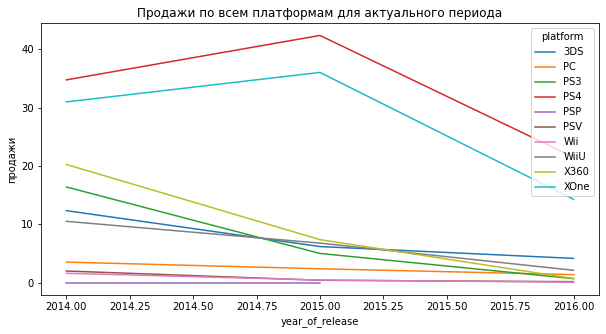

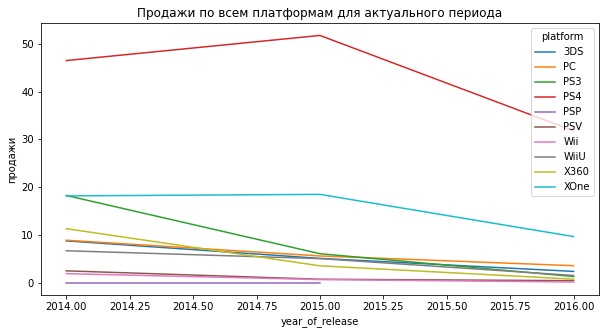

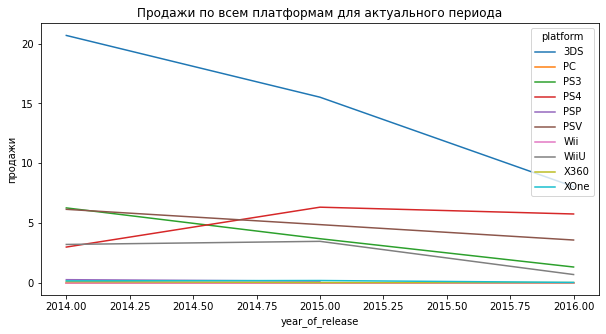

In [68]:
# визуализируем на графике продажи в Америке по всем платформам для актуального периода
actual_data\
.pivot_table(index='year_of_release', columns='platform', values='na_sales', aggfunc='sum')\
.plot(figsize=(10,5), title='Продажи по всем платформам для актуального периода')
plt.ylabel('продажи')
plt.show()

# визуализируем на графике продажи в Европе по всем платформам для актуального периода
actual_data\
.pivot_table(index='year_of_release', columns='platform', values='eu_sales', aggfunc='sum')\
.plot(figsize=(10,5), title='Продажи по всем платформам для актуального периода')
plt.ylabel('продажи')
plt.show()

# визуализируем на графике продажи в Японии по всем платформам для актуального периода
actual_data\
.pivot_table(index='year_of_release', columns='platform', values='jp_sales', aggfunc='sum')\
.plot(figsize=(10,5), title='Продажи по всем платформам для актуального периода')
plt.ylabel('продажи')
plt.show()

Очевидно, что несколько крупных платформ PS4, X360, 3DC, Wii, Ds находятся в конечной стадии жизненного цикла. А многие платформы PSP, PC, PSV падают долго, медленно, но перспективными их явно не назовешь. 

Вместе с тем, на графике видны две потенциально-перспективные платформы XOne и PS4. Они появились в 2013 году, и два года подряд показвают значительный рост. 

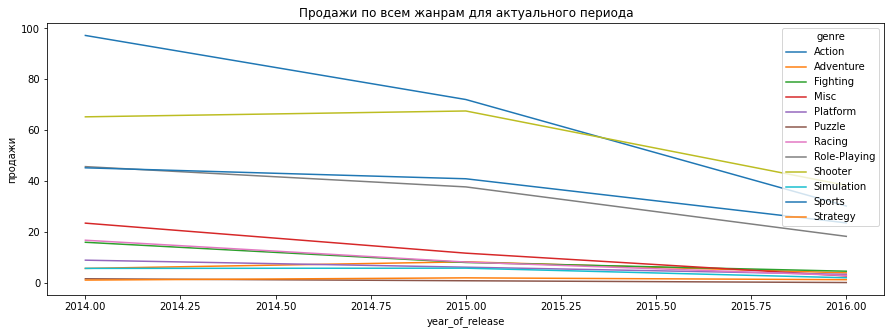

In [69]:
# визуализируем на графике продажи по всем жанрам для актуального периода
actual_data\
.pivot_table(index='year_of_release', columns='genre', values='all_regions_sales', aggfunc='sum')\
.plot(figsize=(15,5), title='Продажи по всем жанрам для актуального периода')
plt.ylabel('продажи')
plt.show()

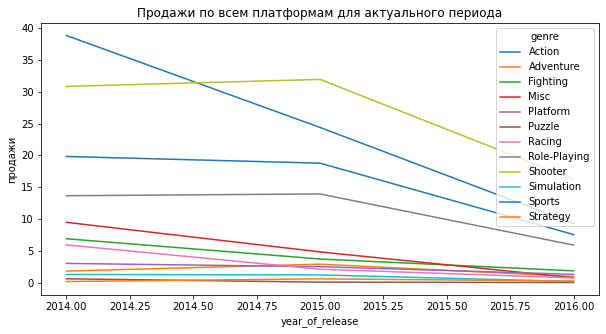

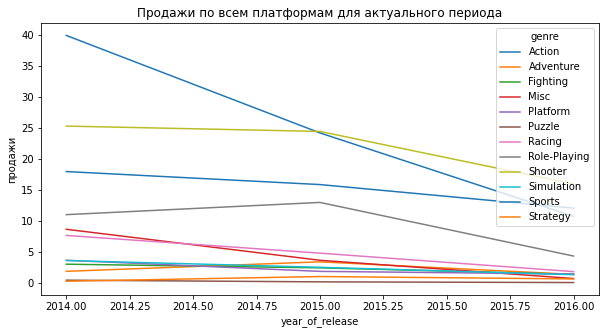

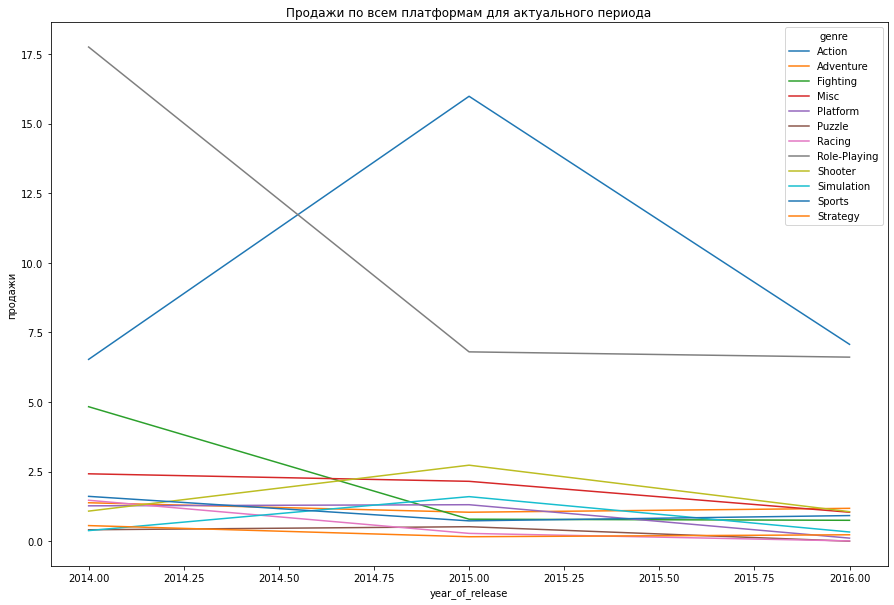

In [70]:
# визуализируем на графике продажи в Америке по всем жанрам для актуального периода
actual_data\
.pivot_table(index='year_of_release', columns='genre', values='na_sales', aggfunc='sum')\
.plot(figsize=(10,5), title='Продажи по всем платформам для актуального периода')
plt.ylabel('продажи')
plt.show()

# визуализируем на графике продажи в Европе по всем жанрам для актуального периода
actual_data\
.pivot_table(index='year_of_release', columns='genre', values='eu_sales', aggfunc='sum')\
.plot(figsize=(10,5), title='Продажи по всем платформам для актуального периода')
plt.ylabel('продажи')
plt.show()

# визуализируем на графике продажи в Японии по всем жанрам для актуального периода
actual_data\
.pivot_table(index='year_of_release', columns='genre', values='jp_sales', aggfunc='sum')\
.plot(figsize=(15,10), title='Продажи по всем платформам для актуального периода')
plt.ylabel('продажи')
plt.show()

#### «Ящик с усами» по глобальным продажам

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

In [71]:
# построим ящик с усами по глобальным продажам для всех платформ
px.box(actual_data, x='all_regions_sales', range_x=[0,1.2], title='ящик с усами по глобальным продажам для всех платформ')

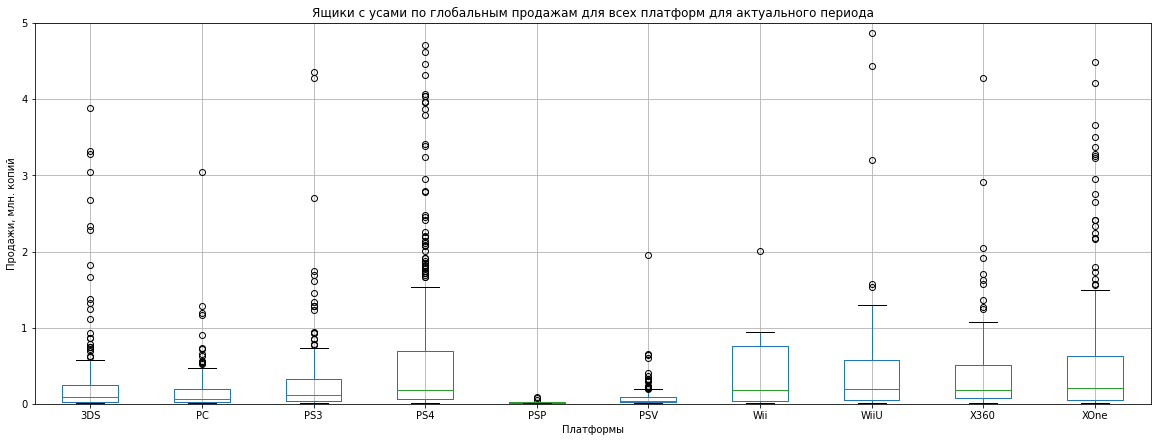

In [72]:
# построим ящики с усами по глобальным продажам для всех платформ (по каждой в отдельности)
fig = plt.figure(figsize =(20, 7))
plt.ylim(0, 5)
actual_data \
.pivot_table(index='name', values='all_regions_sales', columns='platform').boxplot()
plt.ylabel('Продажи, млн. копий')
plt.xlabel('Платформы')
plt.title('Ящики с усами по глобальным продажам для всех платформ для актуального периода')
# plt.figsize(10, 5)
plt.show()

как только мы определем актуальный период, то мы забываем о продажах, которые были до него

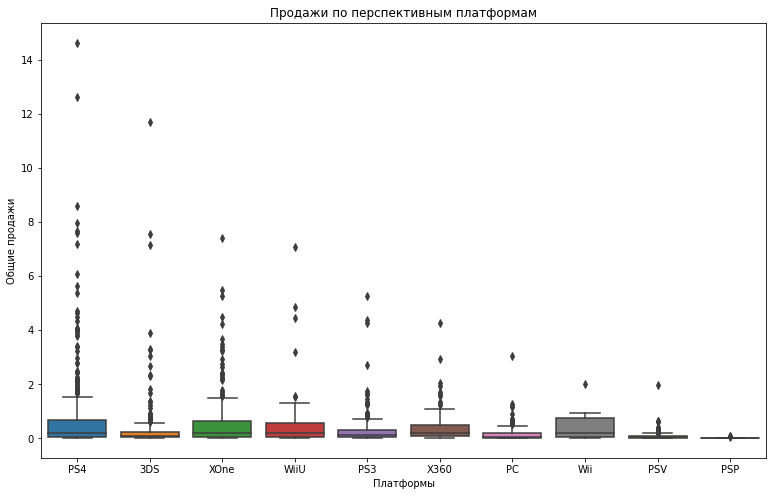

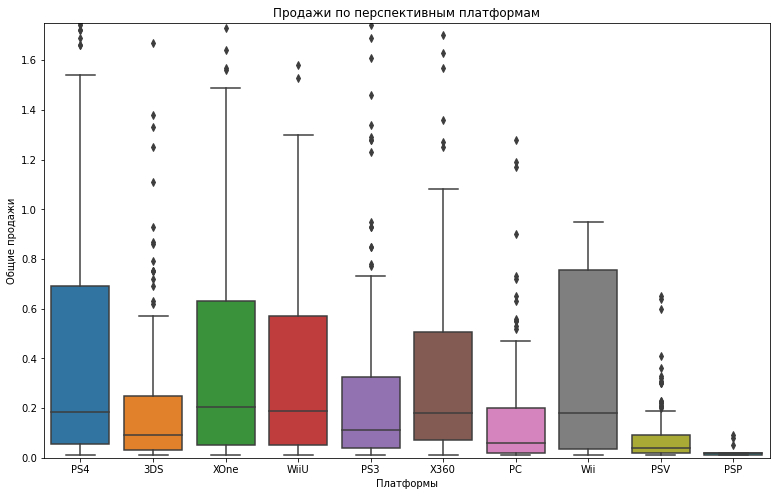

In [73]:
# Комментарий Диаграммы размаха лучше строить в двух видах. Одна полная со всеми выбросами,
# вторая масштабированная с крупными боксплотами, где можно сравнить медианы и квантили.
import seaborn as sns
data_temp, y = actual_data, 'all_regions_sales'
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 1.75)))
plt.show()

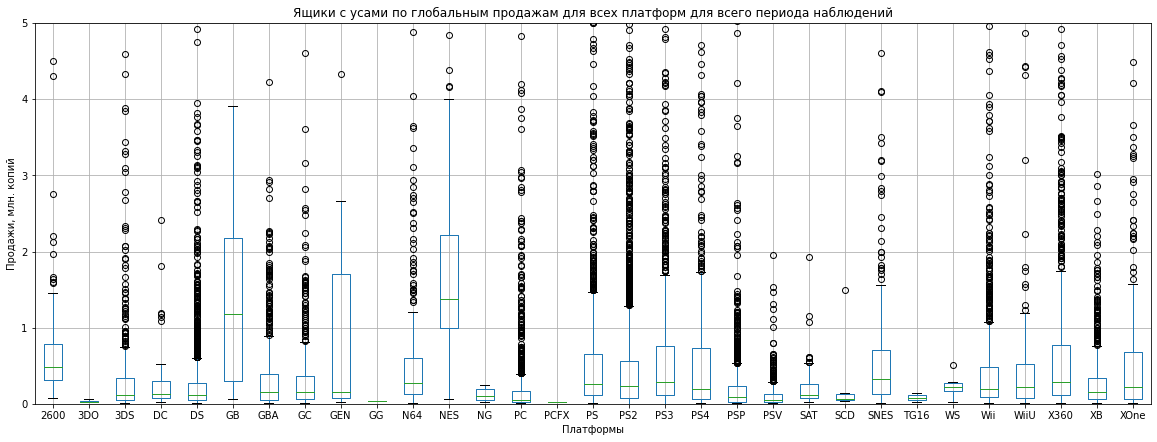

In [74]:
# построим ящики с усами по глобальным продажам для всех платформ (по каждой в отдельности)
fig = plt.figure(figsize =(20, 7))
plt.ylim(0, 5)
base_dataset \
.pivot_table(index='name', values='all_regions_sales', columns='platform').boxplot()
plt.ylabel('Продажи, млн. копий')
plt.xlabel('Платформы')
plt.title('Ящики с усами по глобальным продажам для всех платформ для всего периода наблюдений')
# plt.figsize(10, 5)
plt.show()

Условно разобъём платформы на крупные средние и мелкие, и построим ящики с усами для каждой группы в отдельности, чтобы визуально юыло удобно оценить редультат

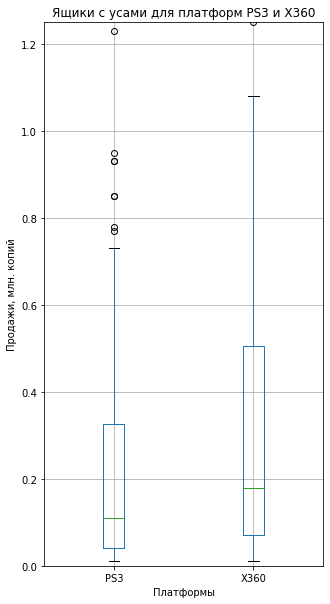

In [75]:
# построим ящики с усами по глобальным продажам для самых крупных платформ (по каждой в отдельности)
plt.figure(figsize =(5, 10))
plt.ylim(0, 1.25)
actual_data[(actual_data['platform'] == 'PS3')\
            |(actual_data['platform'] == 'X360')]\
.pivot_table(index='name', values='all_regions_sales', columns='platform').boxplot()

plt.ylabel('Продажи, млн. копий')
plt.xlabel('Платформы')
plt.title('Ящики с усами для платформ PS3 и X360')
plt.show()

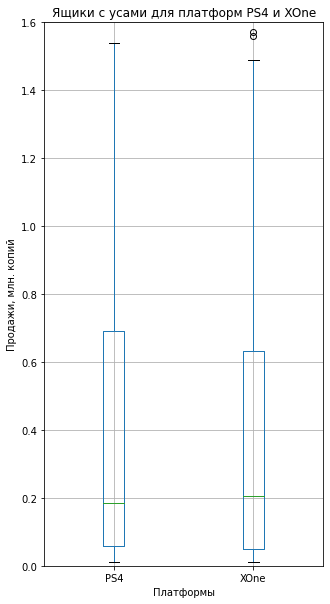

In [76]:
# построим ящики с усами по глобальным продажам для самых крупных платформ (по каждой в отдельности)
plt.figure(figsize =(5, 10))
plt.ylim(0, 1.6)
actual_data[(actual_data['platform'] == 'PS4')\
           |(actual_data['platform'] == 'XOne')]\
.pivot_table(index='name', values='all_regions_sales', columns='platform').boxplot()
plt.ylabel('Продажи, млн. копий')
plt.xlabel('Платформы')
plt.title('Ящики с усами для платформ PS4 и XOne')
plt.show()

Бросается в глаза наличие практически одинаковых параметров у некоторых платформ. Так например медиана, квартили Q1 и Q3, а также размеры усов PS4 и XOne почти идентичны. Аналогичная ситуация по PS3 и X360. Такая идентичность может указывать на то, что платформы являются прямыми конкурентами, играют на одних и тех же территориальных рынках и имеют схожие продажи.

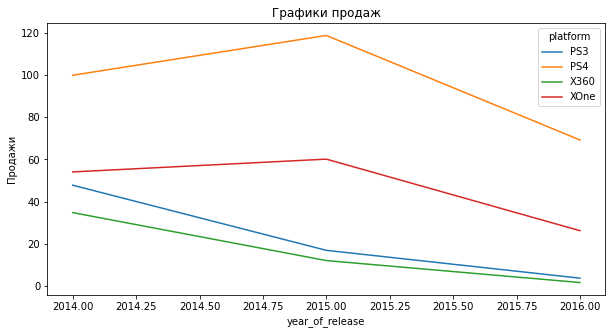

In [77]:
# визуализируем  на графике продажи по платформам выборочно
actual_data[((actual_data['platform'] == 'PS3')\
             |(actual_data['platform'] == 'PS4')\
             |(actual_data['platform'] == 'X360')\
             |(actual_data['platform'] == 'XOne'))]\
.pivot_table(index='year_of_release', columns='platform', values='all_regions_sales', aggfunc='sum')\
.plot(figsize=(10,5))
plt.ylabel('Продажи')
plt.title('Графики продаж')
plt.show()

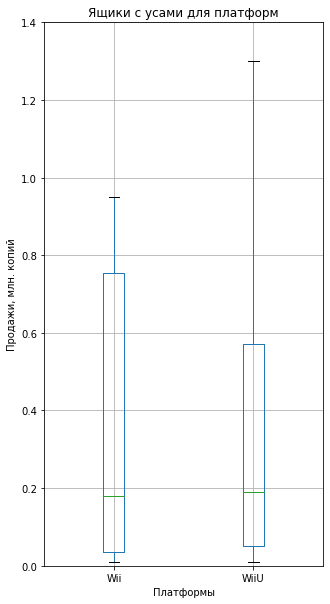

In [78]:
# построим ящики с усами по глобальным продажам для средних платформ (по каждой в отдельности)
plt.figure(figsize =(5, 10))
plt.ylim(0, 1.4)

actual_data[(actual_data['platform'] == 'PS2')\
            |(actual_data['platform'] == 'Wii')\
            |(actual_data['platform'] == 'WiiU')]\
.pivot_table(index='name', values='all_regions_sales', columns='platform').boxplot()

plt.ylabel('Продажи, млн. копий')
plt.xlabel('Платформы')
plt.title('Ящики с усами для платформ')
plt.show()

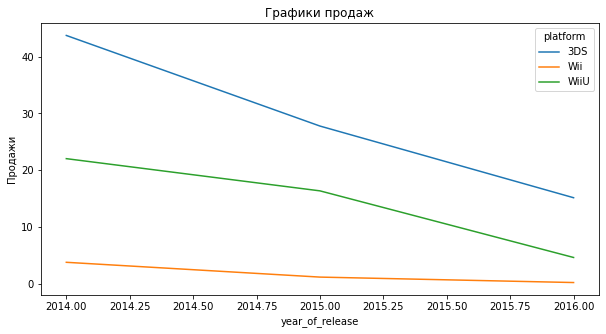

In [79]:
# визуализируем  на графике продажи по платформам выборочно
actual_data[((actual_data['platform'] == '3DS')\
             |(actual_data['platform'] == 'PS2')\
             |(actual_data['platform'] == 'Wii')\
             |(actual_data['platform'] == 'WiiU'))]\
.pivot_table(index='year_of_release', columns='platform', values='all_regions_sales', aggfunc='sum')\
.plot(figsize=(10,5))
plt.ylabel('Продажи')
plt.title('Графики продаж')
plt.show()

В средней категории также заметна идентичность показателей, особенно между PS2, Wii и WiiU

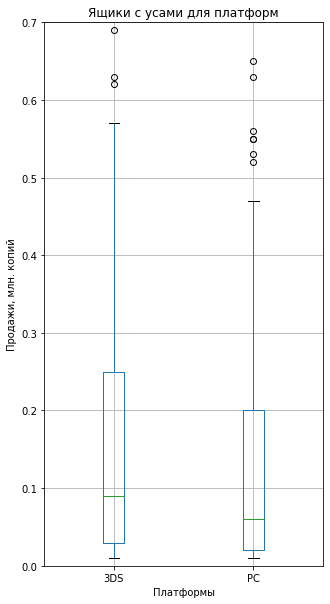

In [80]:
# построим ящики с усами по глобальным продажам для мелких платформ (по каждой в отдельности)
plt.figure(figsize =(5, 10))
plt.ylim(0, 0.7)
actual_data[(actual_data['platform'] == '3DS')\
            |(actual_data['platform'] == 'PC')]\
.pivot_table(index='name', values='all_regions_sales', columns='platform').boxplot()
plt.ylabel('Продажи, млн. копий')
plt.xlabel('Платформы')
plt.title('Ящики с усами для платформ')
plt.show()

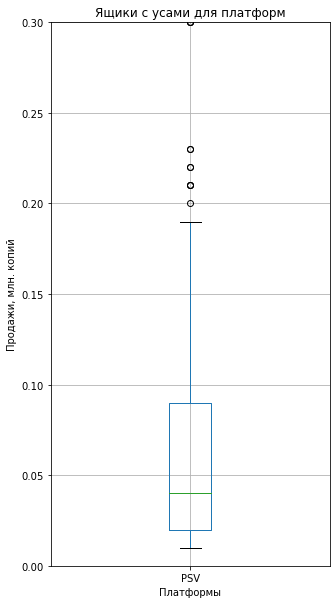

In [81]:
# построим ящики с усами по глобальным продажам для мелких платформ (по каждой в отдельности)
plt.figure(figsize =(5, 10))
plt.ylim(0, 0.3)
actual_data[(actual_data['platform'] == 'PSV')]\
.pivot_table(index='name', values='all_regions_sales', columns='platform').boxplot()
plt.ylabel('Продажи, млн. копий')
plt.xlabel('Платформы')
plt.title('Ящики с усами для платформ')
plt.show()

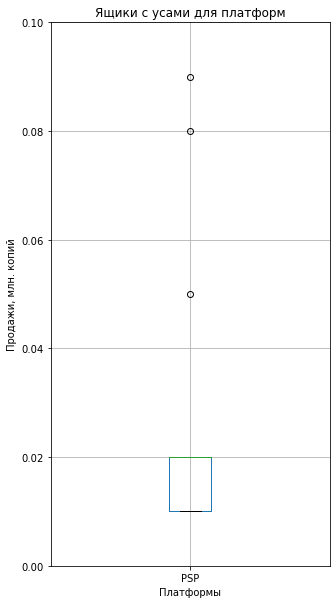

In [82]:
# построим ящики с усами по глобальным продажам для мелких платформ (по каждой в отдельности)
plt.figure(figsize =(5, 10))
plt.ylim(0, 0.1)
actual_data[(actual_data['platform'] == 'PSP')]\
.pivot_table(index='name', values='all_regions_sales', columns='platform').boxplot()
plt.ylabel('Продажи, млн. копий')
plt.xlabel('Платформы')
plt.title('Ящики с усами для платформ')
plt.show()

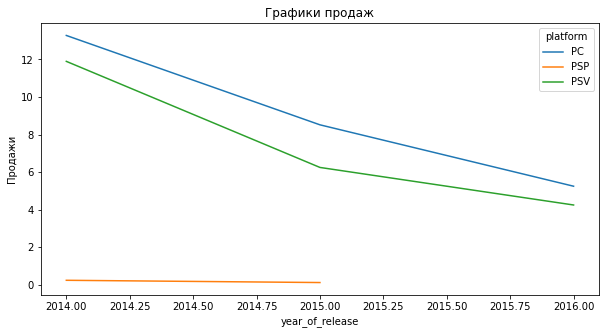

In [83]:
# визуализируем  на графике продажи по платформам выборочно
actual_data[((actual_data['platform'] == 'DS')\
             |(actual_data['platform'] == 'PC')\
             |(actual_data['platform'] == 'PSP')\
             |(actual_data['platform'] == 'PSV'))]\
.pivot_table(index='year_of_release', columns='platform', values='all_regions_sales', aggfunc='sum')\
.plot(figsize=(10,5))
plt.ylabel('Продажи')
plt.title('Графики продаж')
plt.show()

#### Влияние отзывов

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Для примера возьмем одну из наиболее популярных платформ, прошедшую весь жизненный цикл.

Построим диаграмму рассеяния

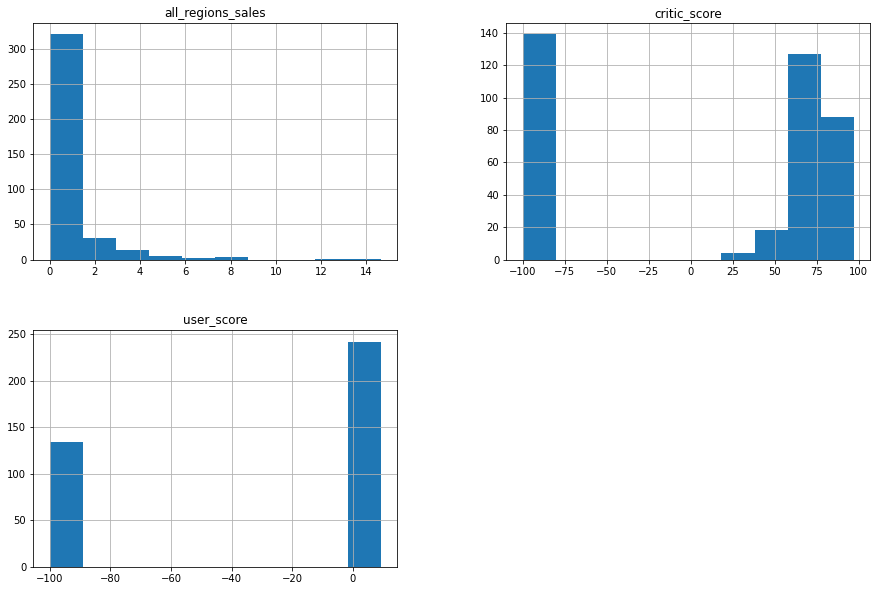

In [84]:
actual_data.loc[actual_data['platform'] == 'PS4',['all_regions_sales', 'critic_score', 'user_score']].hist(figsize=(15,10))
plt.show()

На диаграммах распределения видны пропуски(отрицательные значения-заглушки). Необхдимо их отфильтровывать при дальнейшем анализе

Посчитаем корреляцию между отзывами и продажами

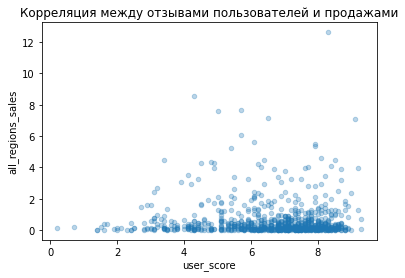

Коэффициент корреляции Пирсона продаж от отзывов пользователей: 0.158


In [85]:
# Посчитаем корреляцию между отзывами пользователей и продажами
# Не забываем отфильтровать пропуски - отрицательную заглушку
actual_data.query('user_score>=0').plot(x='user_score', y='all_regions_sales', kind='scatter', alpha=0.3)
plt.title('Корреляция между отзывами пользователей и продажами')
plt.show()
print('Коэффициент корреляции Пирсона продаж от отзывов пользователей:', round(actual_data['user_score'].corr(actual_data['all_regions_sales']), 3))

Видна слабая зависимость продаж от отзывов пользователей 15,8%

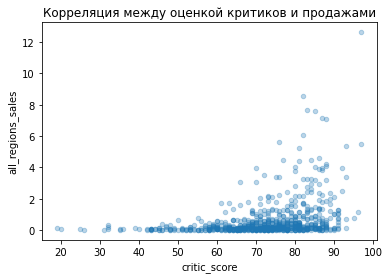

Коэффициент корреляции Пирсона: 0.177


In [86]:
# Посчитаем корреляцию между отзывами критиков и продажами
actual_data.query('critic_score >= 0').plot(x='critic_score', y='all_regions_sales', kind='scatter', alpha=0.3)
plt.title('Корреляция между оценкой критиков и продажами')
plt.show()
print('Коэффициент корреляции Пирсона:', round(actual_data['critic_score'].corr(actual_data['all_regions_sales']), 3))

Несмотря на более ответственное отношение критиков к процессу оценки, зависимость продаж от полученных баллов также невелика (коэффициент корреляции Пирсона 17,7%)

Анализ не выявил сильной зависимости продаж от каких либо отзывов. Этот факт необходимо учитывать при бланировании рекламных компаний в предстоящем году. 

Проведем аналогичный анализ для одной из самых крупных платформ PS4

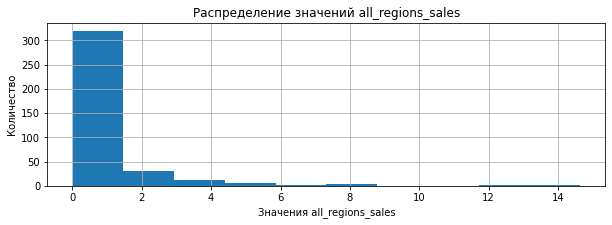

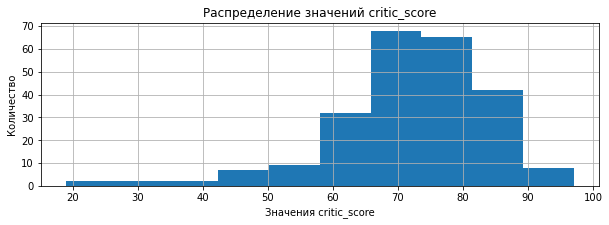

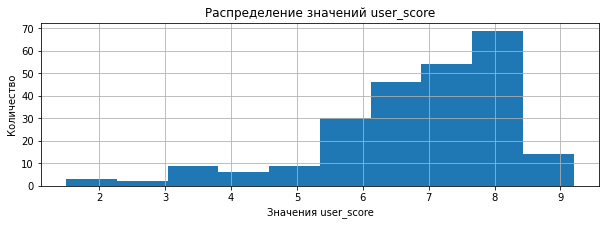

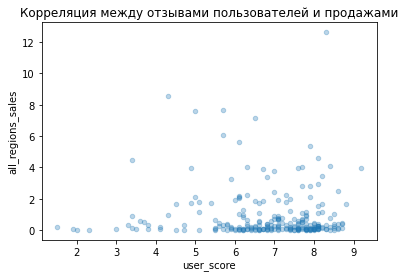

Коэффициент корреляции Пирсона продаж от отзывов пользователей: -0.04


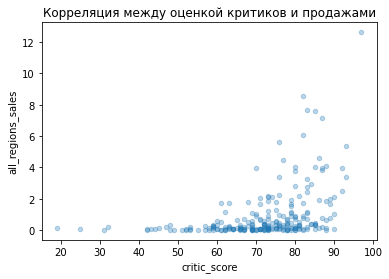

Коэффициент корреляции Пирсона продаж от отзывов пользователей: 0.403


In [87]:
platform = 'PS4'
actual_data.loc[actual_data['platform']\
                == platform,['all_regions_sales']]\
.hist(figsize=(10,3))
plt.xlabel('Значения all_regions_sales')
plt.ylabel('Количество')
plt.title('Распределение значений all_regions_sales')
plt.show()

actual_data.loc[(actual_data['platform']== platform)\
                &(actual_data['critic_score']>=0)
                ,'critic_score']\
.hist(figsize=(10,3))
plt.xlabel('Значения critic_score')
plt.ylabel('Количество')
plt.title('Распределение значений critic_score')
plt.show()

actual_data.loc[(actual_data['platform']== platform)\
                &(actual_data['user_score']>=0)
                ,'user_score']\
.hist(figsize=(10,3))
plt.xlabel('Значения user_score')
plt.ylabel('Количество')
plt.title('Распределение значений user_score')
plt.show()

# Посчитаем корреляцию между отзывами пользователей и продажами
# Не забываем отфильтровать пропуски - отрицательную заглушку
actual_data\
.loc[(actual_data['user_score']>=0)&(actual_data['platform']==platform)]\
.plot(x='user_score', y='all_regions_sales', kind='scatter', alpha=0.3)
plt.title('Корреляция между отзывами пользователей и продажами')
plt.show()

print('Коэффициент корреляции Пирсона продаж от отзывов пользователей:',\
      round(actual_data.loc[(actual_data['user_score']>=0)&(actual_data['platform']==platform), 'user_score']\
            .corr(actual_data.loc[(actual_data['user_score']>=0)&(actual_data['platform']==platform), 'all_regions_sales']), 3))

# Посчитаем корреляцию между оценкой критиков и продажами
# Не забываем отфильтровать пропуски - отрицательную заглушку
actual_data\
.loc[(actual_data['critic_score']>=0)&(actual_data['platform']==platform)]\
.plot(x='critic_score', y='all_regions_sales', kind='scatter', alpha=0.3)
plt.title('Корреляция между оценкой критиков и продажами')
plt.show()

print('Коэффициент корреляции Пирсона продаж от отзывов пользователей:',\
      round(actual_data.loc[(actual_data['critic_score']>=0)&(actual_data['platform']==platform), 'critic_score']\
            .corr(actual_data.loc[(actual_data['critic_score']>=0)&(actual_data['platform']==platform), 'all_regions_sales']), 3))

#### Продажи на других платформах


Проведем анализ зависимости между отзывами и продажами для платформы PS4


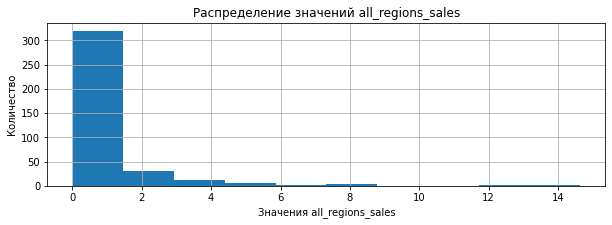

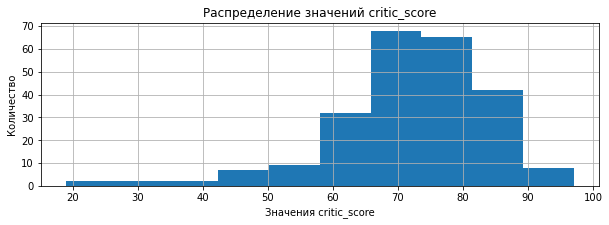

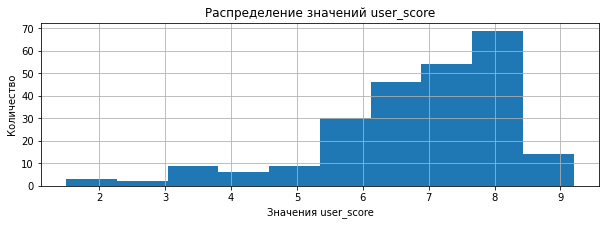

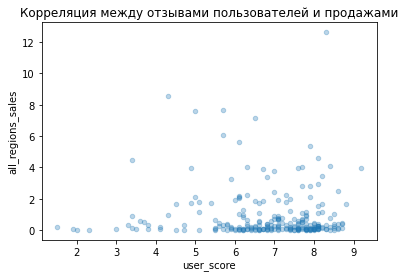

Коэффициент корреляции Пирсона продаж от отзывов пользователей: -0.04


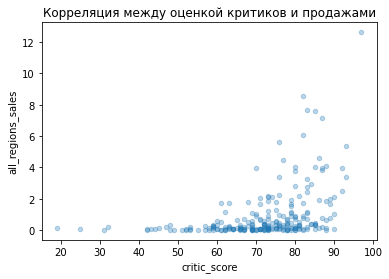

Коэффициент корреляции Пирсона продаж от отзывов пользователей: 0.403

Проведем анализ зависимости между отзывами и продажами для платформы 3DS


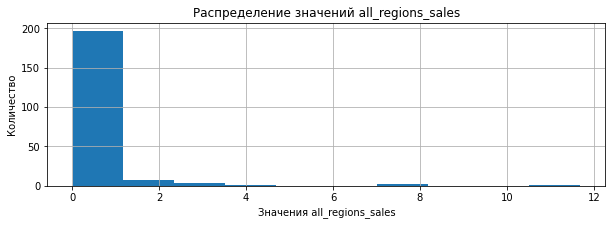

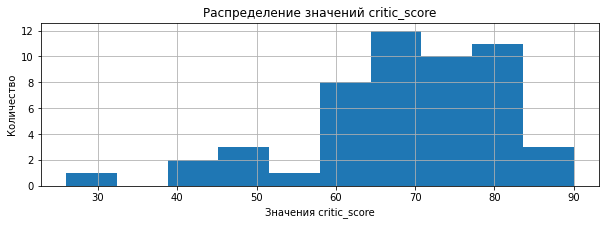

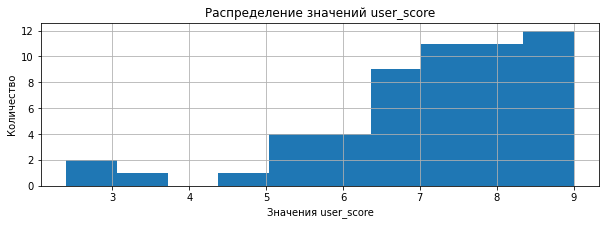

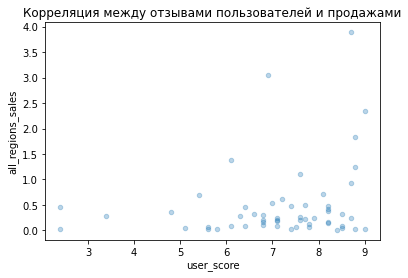

Коэффициент корреляции Пирсона продаж от отзывов пользователей: 0.215


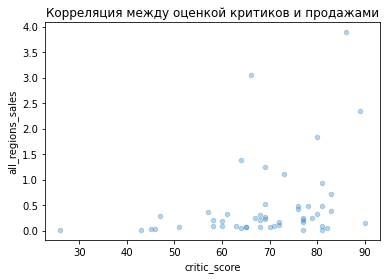

Коэффициент корреляции Пирсона продаж от отзывов пользователей: 0.314

Проведем анализ зависимости между отзывами и продажами для платформы XOne


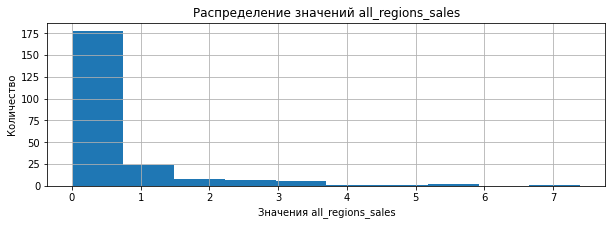

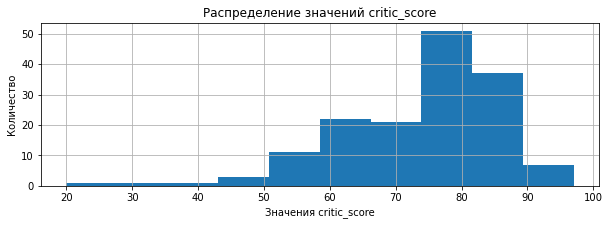

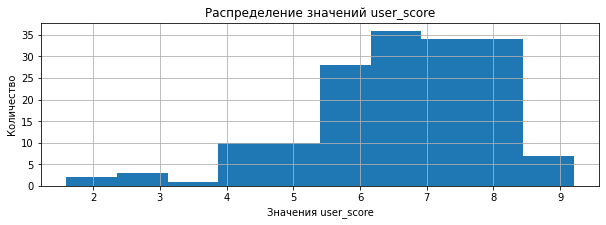

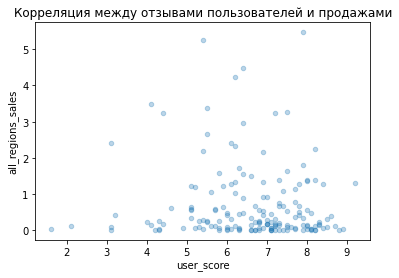

Коэффициент корреляции Пирсона продаж от отзывов пользователей: -0.07


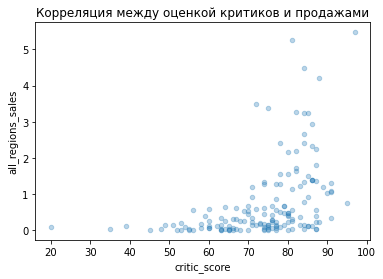

Коэффициент корреляции Пирсона продаж от отзывов пользователей: 0.429

Проведем анализ зависимости между отзывами и продажами для платформы WiiU


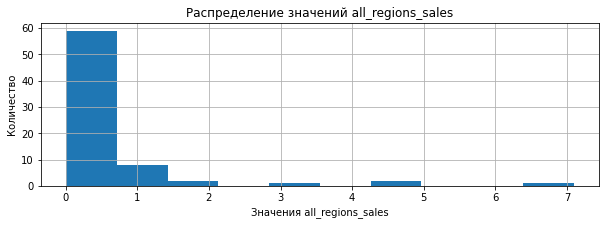

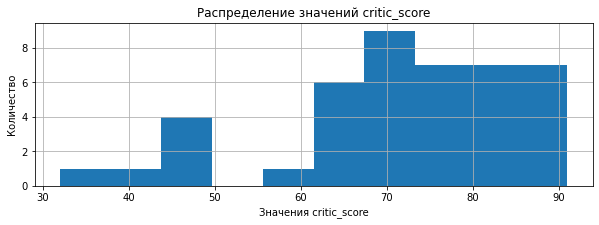

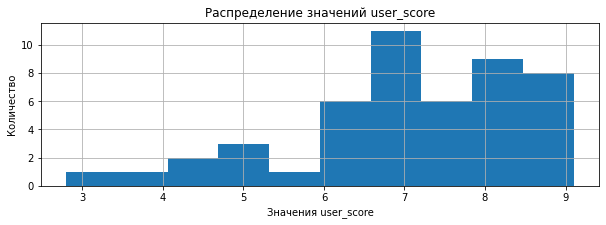

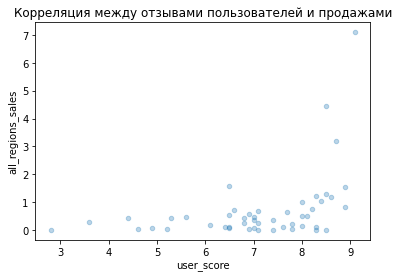

Коэффициент корреляции Пирсона продаж от отзывов пользователей: 0.408


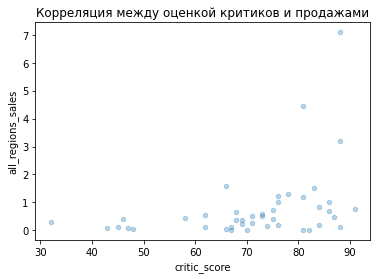

Коэффициент корреляции Пирсона продаж от отзывов пользователей: 0.37

Проведем анализ зависимости между отзывами и продажами для платформы PS3


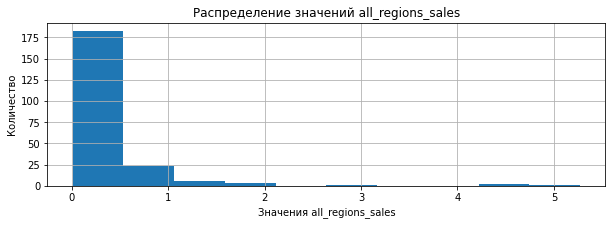

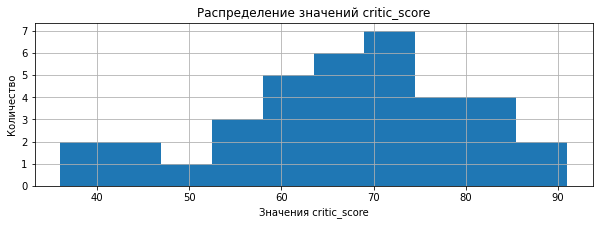

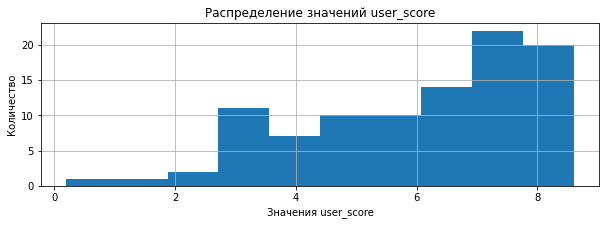

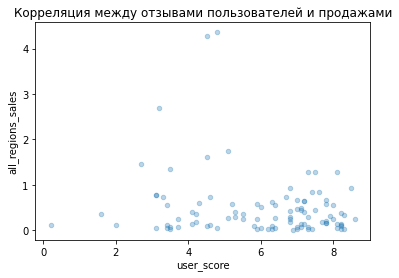

Коэффициент корреляции Пирсона продаж от отзывов пользователей: -0.167


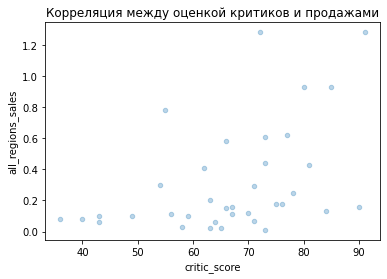

Коэффициент корреляции Пирсона продаж от отзывов пользователей: 0.447

Проведем анализ зависимости между отзывами и продажами для платформы X360


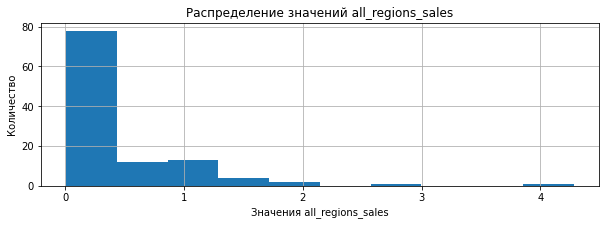

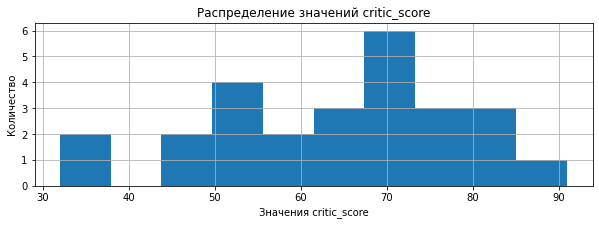

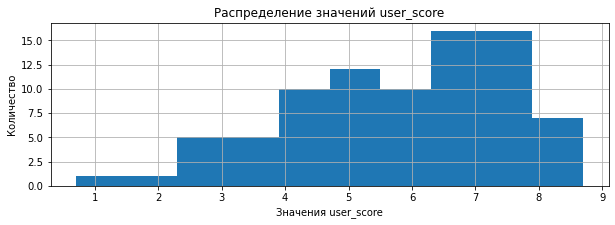

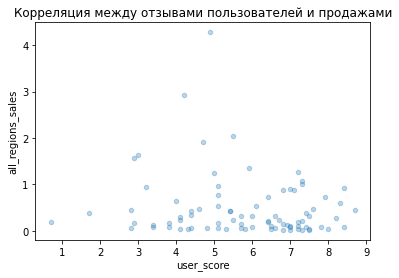

Коэффициент корреляции Пирсона продаж от отзывов пользователей: -0.138


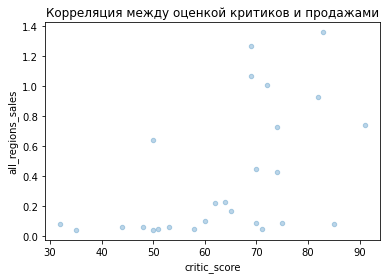

Коэффициент корреляции Пирсона продаж от отзывов пользователей: 0.526

Проведем анализ зависимости между отзывами и продажами для платформы PC


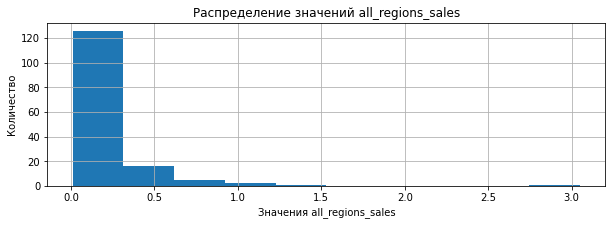

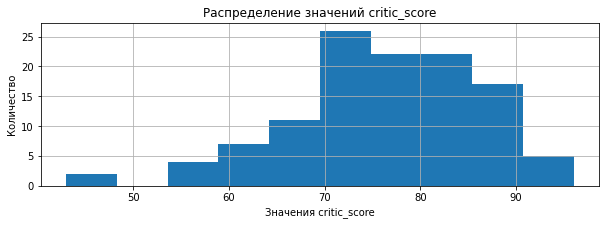

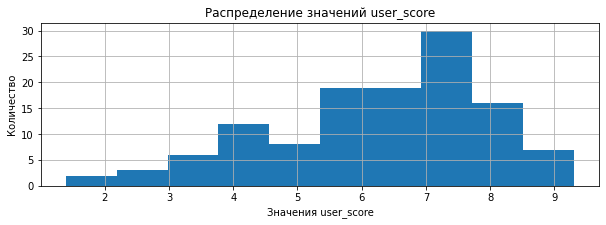

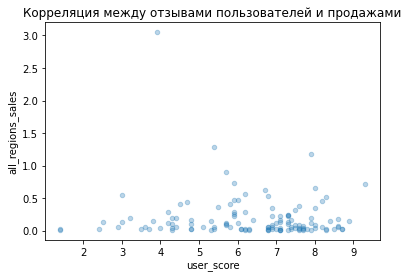

Коэффициент корреляции Пирсона продаж от отзывов пользователей: -0.072


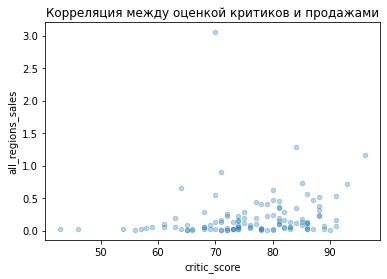

Коэффициент корреляции Пирсона продаж от отзывов пользователей: 0.175

Проведем анализ зависимости между отзывами и продажами для платформы Wii


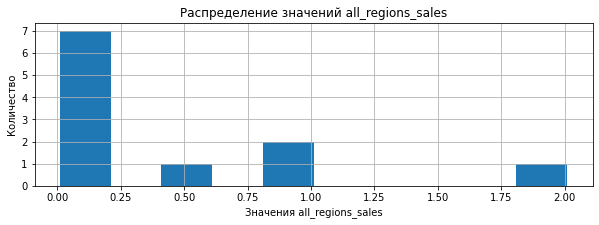

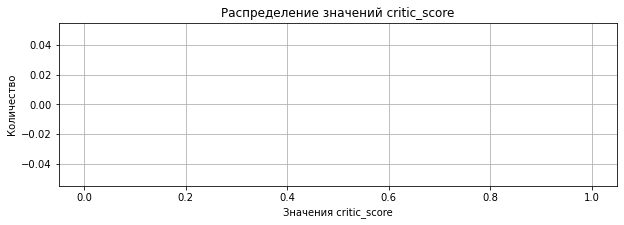

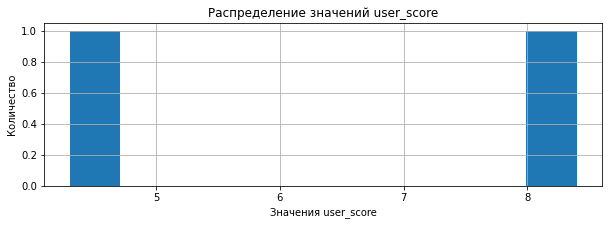

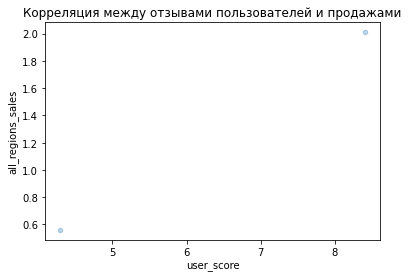

Коэффициент корреляции Пирсона продаж от отзывов пользователей: 1.0


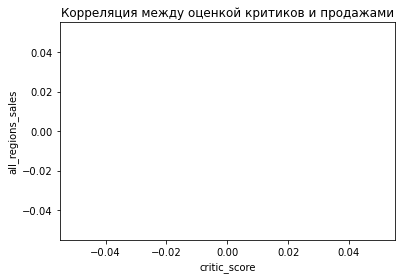

Коэффициент корреляции Пирсона продаж от отзывов пользователей: nan

Проведем анализ зависимости между отзывами и продажами для платформы PSV


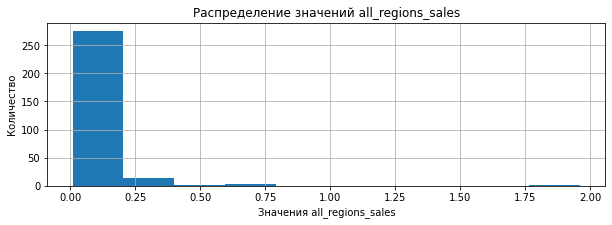

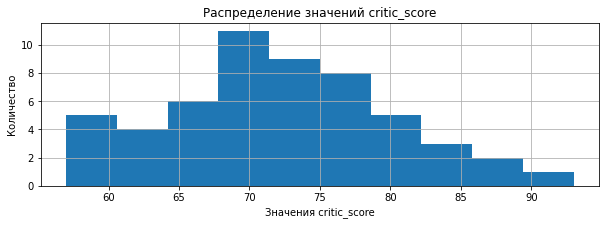

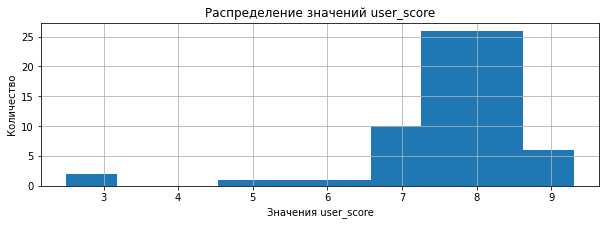

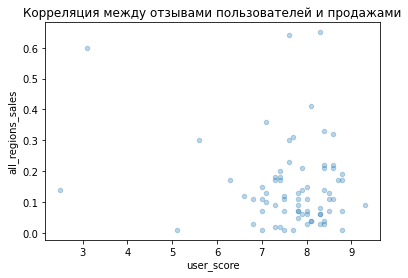

Коэффициент корреляции Пирсона продаж от отзывов пользователей: -0.168


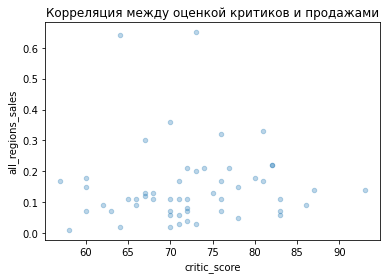

Коэффициент корреляции Пирсона продаж от отзывов пользователей: 0.043

Проведем анализ зависимости между отзывами и продажами для платформы PSP


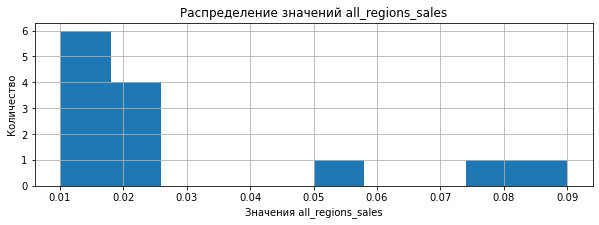

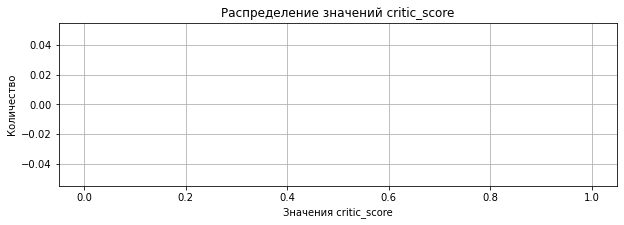

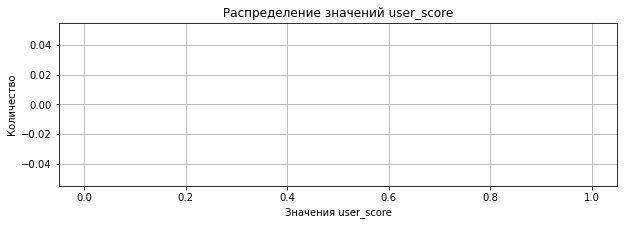

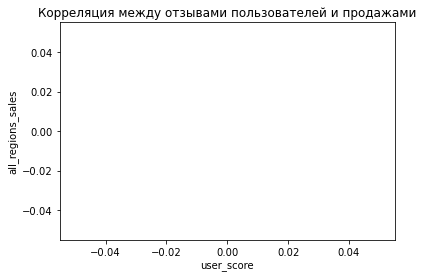

Коэффициент корреляции Пирсона продаж от отзывов пользователей: nan


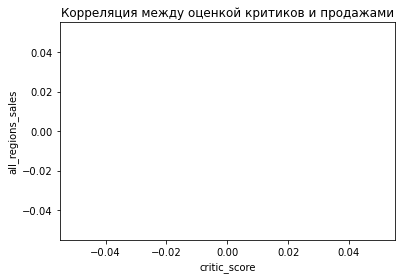

Коэффициент корреляции Пирсона продаж от отзывов пользователей: nan


In [88]:
# Проведем анализ зависимости между отзывами и продажами для платформ ТОП-10
for platform in actual_platform:
    print('')
    print('Проведем анализ зависимости между отзывами и продажами для платформы', platform)
    
    actual_data.loc[actual_data['platform']\
                == platform,['all_regions_sales']]\
    .hist(figsize=(10,3))
    plt.xlabel('Значения all_regions_sales')
    plt.ylabel('Количество')
    plt.title('Распределение значений all_regions_sales')
    plt.show()

    actual_data.loc[(actual_data['platform']== platform)\
                    &(actual_data['critic_score']>=0)
                    ,'critic_score']\
    .hist(figsize=(10,3))
    plt.xlabel('Значения critic_score')
    plt.ylabel('Количество')
    plt.title('Распределение значений critic_score')
    plt.show()

    actual_data.loc[(actual_data['platform']== platform)\
                    &(actual_data['user_score']>=0)
                    ,'user_score']\
    .hist(figsize=(10,3))
    plt.xlabel('Значения user_score')
    plt.ylabel('Количество')
    plt.title('Распределение значений user_score')
    plt.show()

    # Посчитаем корреляцию между отзывами пользователей и продажами
    # Не забываем отфильтровать пропуски - отрицательную заглушку
    actual_data\
    .loc[(actual_data['user_score']>=0)&(actual_data['platform']==platform)]\
    .plot(x='user_score', y='all_regions_sales', kind='scatter', alpha=0.3)
    plt.title('Корреляция между отзывами пользователей и продажами')
    plt.show()

    print('Коэффициент корреляции Пирсона продаж от отзывов пользователей:',\
          round(actual_data.loc[(actual_data['user_score']>=0)&(actual_data['platform']==platform), 'user_score']\
                .corr(actual_data.loc[(actual_data['user_score']>=0)&(actual_data['platform']==platform), 'all_regions_sales']), 3))

    # Посчитаем корреляцию между оценкой критиков и продажами
    # Не забываем отфильтровать пропуски - отрицательную заглушку
    actual_data\
    .loc[(actual_data['critic_score']>=0)&(actual_data['platform']==platform)]\
    .plot(x='critic_score', y='all_regions_sales', kind='scatter', alpha=0.3)
    plt.title('Корреляция между оценкой критиков и продажами')
    plt.show()

    print('Коэффициент корреляции Пирсона продаж от отзывов пользователей:',\
          round(actual_data.loc[(actual_data['critic_score']>=0)&(actual_data['platform']==platform), 'critic_score']\
                .corr(actual_data.loc[(actual_data['critic_score']>=0)&(actual_data['platform']==platform), 'all_regions_sales']), 3))

При анализе платформ из ТОП-10. Вывод об отсутствии зависимости подтверждается. Анализ не выявил сильной зависимости продаж от каких либо отзывов. Этот факт необходимо учитывать при бланировании рекламных компаний в предстоящем году.

#### Распределение игр по жанрам

Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [89]:
# подготовим вспомогательную таблицу
genre_data = actual_data.pivot_table(index='genre', values=['all_regions_sales', 'critic_score', 'user_score'], aggfunc=['sum','median'])\
# 
genre_data.columns=['all_regions_sales', 'critic_score_sum', 'user_score_sum', 'median_all_regions_sales', 'median_critic_score', 'median_user_score']
genre_data = genre_data[['all_regions_sales', 'median_critic_score', 'median_user_score']].sort_values('all_regions_sales', ascending=False)
genre_data

all_regions_sales  median_critic_score  median_user_score
genre                                                                  
Action                   199.36               -100.0            -100.00
Shooter                  170.94                 72.0               6.40
Sports                   109.48                 31.0               4.50
Role-Playing             101.44               -100.0            -100.00
Misc                      37.55               -100.0            -100.00
Fighting                  28.22                 51.0               5.80
Racing                    27.52                 65.0               5.80
Platform                  18.09                 73.5               6.05
Adventure                 17.55               -100.0            -100.00
Simulation                13.13                -28.5               3.95
Strategy                   3.96               -100.0            -100.00
Puzzle                     2.21               -100.0            -100.00

По глобальным продажам есть три жанра-лидера Action, Sports, Shooter. Зависимость от оценок, как было определено выше, не прослеживается. Для более детального анализа посмотрим в разбивке каждого жанра по рейтингу.

In [90]:
# подготовим вспомогательную таблицу
genre_data = actual_data.pivot_table(index=['genre','rating'], values=['all_regions_sales', 'critic_score', 'user_score'], aggfunc=['sum','median'])\
# 
genre_data.columns=['all_regions_sales', 'critic_score_sum', 'user_score_sum', 'median_all_regions_sales', 'median_critic_score', 'median_user_score']
genre_data = genre_data[['all_regions_sales', 'median_critic_score', 'median_user_score']]\
.sort_values('all_regions_sales', ascending=False)
genre_data.head(10)

all_regions_sales  median_critic_score  \
genre        rating                                              
Action       M                      91.40                 71.0   
Shooter      M                      89.83                 76.5   
Sports       E                      86.22                 53.0   
Action       no_rating              51.40               -100.0   
Role-Playing no_rating              47.41               -100.0   
Shooter      no_rating              41.18               -100.0   
Role-Playing M                      34.51                 77.0   
Action       E10+                   31.47                 58.0   
Shooter      T                      31.02                 70.0   
Misc         no_rating              20.17               -100.0   

                        median_user_score  
genre        rating                        
Action       M                       6.95  
Shooter      M                       6.80  
Sports       E                       5.30  
Action       no_rating            -100.00  
Role-Playing no_rating            -100.00  
Shooter      no_rating            -100.00  
Role-Playing M                       6.90  
Action       E10+                    6.80  
Shooter      T                       6.05  
Misc         no_rating            -100.00

В разбивке по рейтингу тройка лидеров Action, Sports, Shooter. сохраняется.  Жанры  Shooter и Action имеют максимальные продажи в более популярном рейтинге «M» («Mature») — «Для взрослых».
Для Sports характерен рейтинг «E» («Everyone») - «Для всех»

Отсортируем медианные продажи по жанрам по убыванию

In [91]:
actual_data.pivot_table(index='genre', aggfunc='median')\
[['all_regions_sales']]\
.sort_values('all_regions_sales', ascending=False)

all_regions_sales
genre                          
Shooter                   0.515
Sports                    0.180
Platform                  0.140
Fighting                  0.125
Role-Playing              0.110
Simulation                0.100
Action                    0.090
Misc                      0.090
Racing                    0.090
Strategy                  0.060
Puzzle                    0.045
Adventure                 0.030

По анализу медианных продаж в тройке лидеров жанры Shooter, Sports и Platform. 

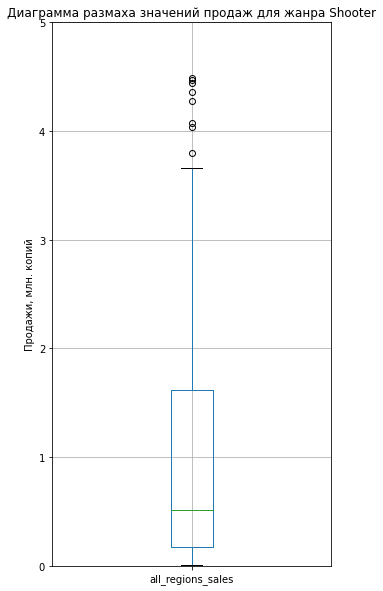

In [92]:
# построим диаграмму размаха для жанра Shooter
plt.figure(figsize =(5, 10))
plt.ylim(0, 5)
actual_data[(actual_data['genre'] == 'Shooter')][['all_regions_sales']].boxplot()
plt.ylabel('Продажи, млн. копий')

plt.title('Диаграмма размаха значений продаж для жанра Shooter')
plt.show()

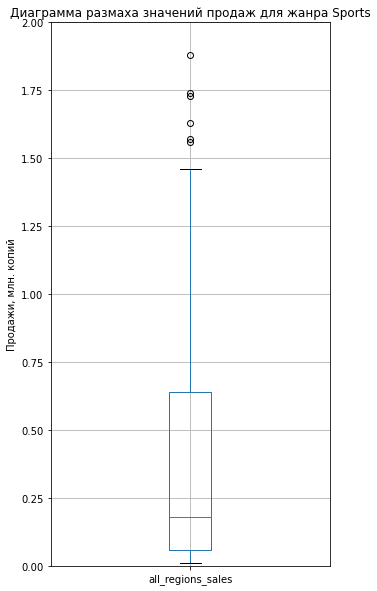

In [93]:
# построим диаграмму размаха для жанра Sports
plt.figure(figsize =(5, 10))
plt.ylim(0, 2)
actual_data[(actual_data['genre'] == 'Sports')][['all_regions_sales']].boxplot()
plt.ylabel('Продажи, млн. копий')

plt.title('Диаграмма размаха значений продаж для жанра Sports')
plt.show()

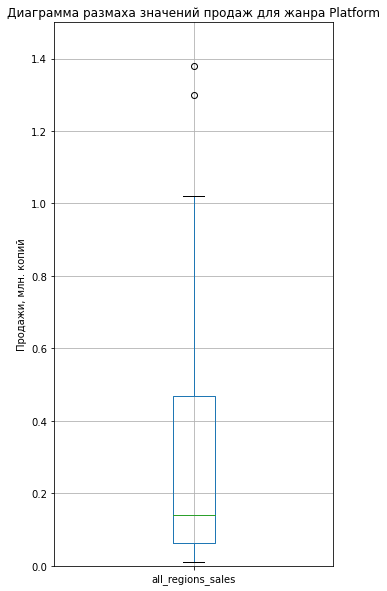

In [94]:
# построим диаграмму размаха для жанра Platform
plt.figure(figsize =(5, 10))
plt.ylim(0, 1.5)
actual_data[(actual_data['genre'] == 'Platform')][['all_regions_sales']].boxplot()
plt.ylabel('Продажи, млн. копий')

plt.title('Диаграмма размаха значений продаж для жанра Platform')
plt.show()

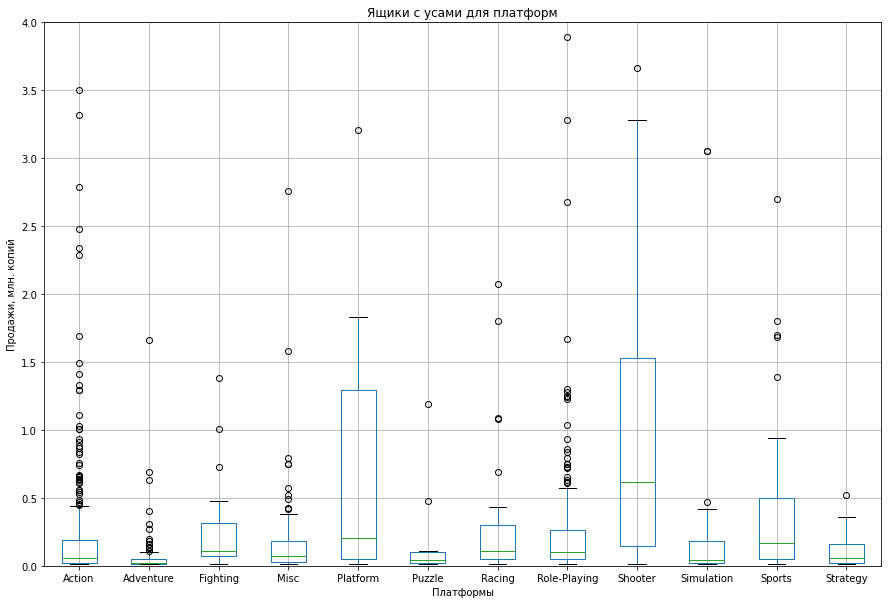

In [95]:
# построим ящики с усами по глобальным продажам для средних платформ (по каждой в отдельности)
plt.figure(figsize =(15, 10))
plt.ylim(0, 4)

actual_data\
.pivot_table(index='name', values='all_regions_sales', columns='genre', aggfunc='median').boxplot()

plt.ylabel('Продажи, млн. копий')
plt.xlabel('Платформы')
plt.title('Ящики с усами для платформ')
plt.show()

Медианные значения на диаграммах размаха подтверждают вывод о лидерстве жанров Shooter, Sports и Platform. Т.е. это стабильные жанры, которые приносят доход не зависимо от платформы, значит на эти жанры есть устойчивый спрос!

### Портрет пользователя каждого региона

Самые популярные платформы (топ-5)

In [96]:
# подготовим вспомогательную таблицу
user_portrait = \
actual_data.pivot_table\
        (index='platform', \
        values=['all_regions_sales', 'na_sales', 'eu_sales', 'jp_sales'],\
        aggfunc='sum')
user_portrait['%_eu'] = round(user_portrait['eu_sales'] / user_portrait['all_regions_sales']*100, 1)
user_portrait['%_jp'] = round(user_portrait['jp_sales'] / user_portrait['all_regions_sales']*100, 1)
user_portrait['%_na'] = round(user_portrait['na_sales'] / user_portrait['all_regions_sales']*100, 1)
user_portrait = user_portrait.sort_values('%_eu', ascending=False)

In [97]:
# ТОП-5 платформ на рынке европы
user_portrait.head()

all_regions_sales  eu_sales  jp_sales  na_sales  %_eu  %_jp  %_na
platform                                                                   
PC                    27.05     17.97      0.00      7.23  66.4   0.0  26.7
Wii                    5.07      2.59      0.00      2.08  51.1   0.0  41.0
PS4                  288.15    130.04     15.02     98.61  45.1   5.2  34.2
PS3                   68.18     25.54     11.22     22.05  37.5  16.5  32.3
XOne                 140.36     46.25      0.32     81.27  33.0   0.2  57.9

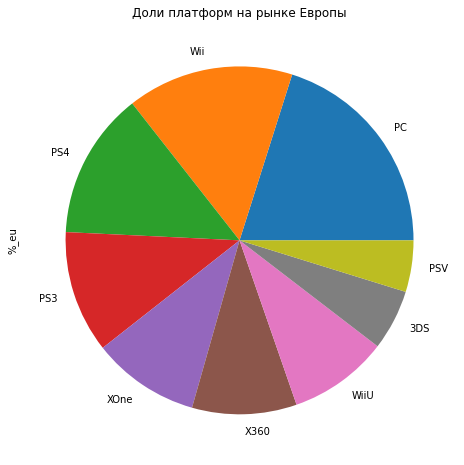

In [98]:
user_portrait['%_eu'].plot(title = 'Доли платформ на рынке Европы', kind='pie', figsize=(8,8))
plt.show()

На европейском рынке платформы распределены относительно равномерно, что говорит о высокой конкуренции и стабильном спросе

In [99]:
# ТОП-5 платформ на рынке Японии
user_portrait.sort_values('%_jp', ascending=False).head()

all_regions_sales  eu_sales  jp_sales  na_sales  %_eu   %_jp  %_na
platform                                                                    
PSP                    0.36      0.00      0.36      0.00   0.0  100.0   0.0
PSV                   22.40      3.53     14.54      2.52  15.8   64.9  11.2
3DS                   86.68     16.12     44.24     22.64  18.6   51.0  26.1
WiiU                  42.98     13.15      7.31     19.36  30.6   17.0  45.0
PS3                   68.18     25.54     11.22     22.05  37.5   16.5  32.3

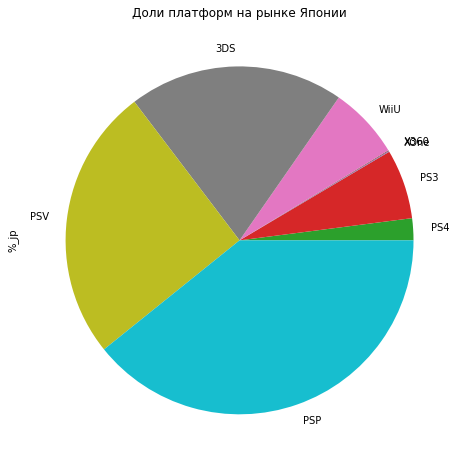

In [100]:
user_portrait['%_jp'].plot(title = 'Доли платформ на рынке Японии', kind='pie', figsize=(8,8))
plt.show()

БОльшую долю в продажах в Японии занимают исключительно национальные платформы, которые продаются полностью или преимущественно в Японии (PSP, PSV, 3DS).  Платформы WiiU, PS3 популярны одинаково как в Японии так и в других странах и имеют на Японском рынке долю от 15 до 20%.

In [101]:
# ТОП-5 платформ на рынке Северной америки
user_portrait.sort_values('%_na', ascending=False).head()

all_regions_sales  eu_sales  jp_sales  na_sales  %_eu  %_jp  %_na
platform                                                                   
X360                  48.22     15.49      0.08     28.30  32.1   0.2  58.7
XOne                 140.36     46.25      0.32     81.27  33.0   0.2  57.9
WiiU                  42.98     13.15      7.31     19.36  30.6  17.0  45.0
Wii                    5.07      2.59      0.00      2.08  51.1   0.0  41.0
PS4                  288.15    130.04     15.02     98.61  45.1   5.2  34.2

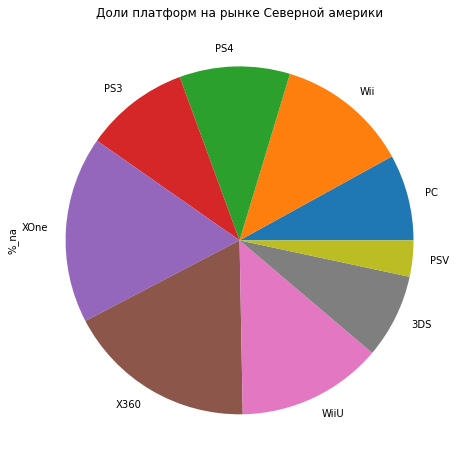

In [102]:
user_portrait['%_na'].plot(title = 'Доли платформ на рынке Северной америки', kind='pie', figsize=(8,8))
plt.show()

На северо-американском рынке платформы распределены ещё более равномерно чем даже в европе, что говорит о самой высокой конкуренции, а также о стабильном спросе

Посмотрим самые популярные жанры

In [103]:
# подготовим вспомогательную таблицу
popular_genre = \
actual_data.pivot_table\
        (index='genre', \
        values=['all_regions_sales', 'na_sales', 'eu_sales', 'jp_sales'],\
        aggfunc='sum')
popular_genre['%_eu'] = round(popular_genre['eu_sales'] / popular_genre['all_regions_sales']*100, 1)
popular_genre['%_jp'] = round(popular_genre['jp_sales'] / popular_genre['all_regions_sales']*100, 1)
popular_genre['%_na'] = round(popular_genre['na_sales'] / popular_genre['all_regions_sales']*100, 1)
popular_genre = popular_genre.sort_values('%_eu', ascending=False)

In [104]:
# ТОП-5 популярных жанров в европе
popular_genre.head()

all_regions_sales  eu_sales  jp_sales  na_sales  %_eu  %_jp  %_na
genre                                                                        
Simulation              13.13      7.30      2.31      2.63  55.6  17.6  20.0
Racing                  27.52     14.13      1.76      8.74  51.3   6.4  31.8
Strategy                 3.96      1.79      0.95      0.98  45.2  24.0  24.7
Sports                 109.48     45.73      3.26     46.13  41.8   3.0  42.1
Shooter                170.94     65.52      4.87     79.02  38.3   2.8  46.2

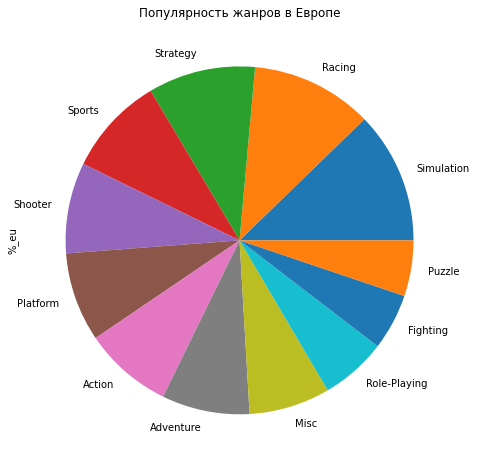

In [105]:
popular_genre['%_eu'].plot(title = 'Популярность жанров в Европе', kind='pie', figsize=(8,8))
plt.show()

In [106]:
# ТОП-5 популярных жанров в северной америке
popular_genre.sort_values('%_na', ascending=False).head()

all_regions_sales  eu_sales  jp_sales  na_sales  %_eu  %_jp  %_na
genre                                                                      
Shooter              170.94     65.52      4.87     79.02  38.3   2.8  46.2
Fighting              28.22      6.69      6.37     12.43  23.7  22.6  44.0
Sports               109.48     45.73      3.26     46.13  41.8   3.0  42.1
Misc                  37.55     12.86      5.61     15.05  34.2  14.9  40.1
Platform              18.09      6.80      2.69      6.79  37.6  14.9  37.5

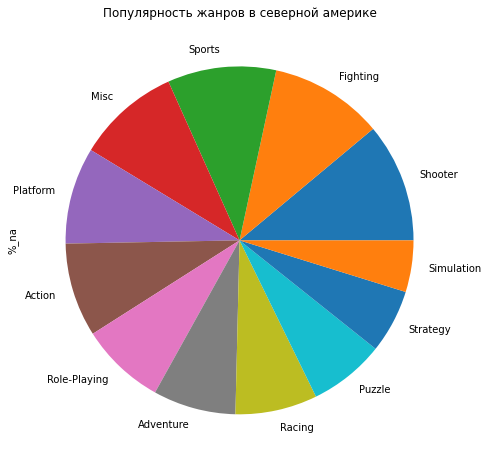

In [107]:
popular_genre.sort_values('%_na', ascending=False)['%_na'].plot(title = 'Популярность жанров в северной америке', kind='pie', figsize=(8,8))
plt.show()

In [108]:
# ТОП-5 популярных жанров в Японии
popular_genre.sort_values('%_jp', ascending=False).head()

all_regions_sales  eu_sales  jp_sales  na_sales  %_eu  %_jp  \
genre                                                                       
Puzzle                     2.21      0.52      0.93      0.65  23.5  42.1   
Role-Playing             101.44     28.17     31.16     33.47  27.8  30.7   
Strategy                   3.96      1.79      0.95      0.98  45.2  24.0   
Fighting                  28.22      6.69      6.37     12.43  23.7  22.6   
Adventure                 17.55      6.49      3.60      5.64  37.0  20.5   

              %_na  
genre               
Puzzle        29.4  
Role-Playing  33.0  
Strategy      24.7  
Fighting      44.0  
Adventure     32.1

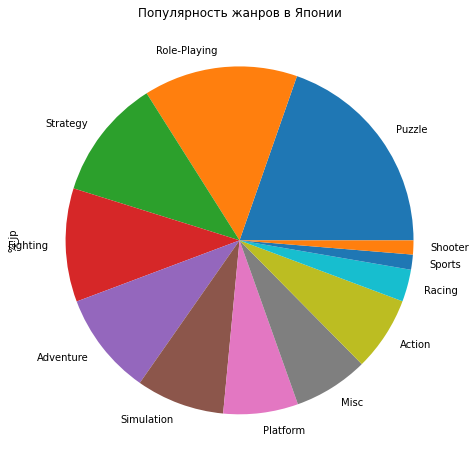

In [109]:
popular_genre.sort_values('%_jp', ascending=False)['%_jp'].plot(title = 'Популярность жанров в Японии', kind='pie', figsize=(8,8))
plt.show()

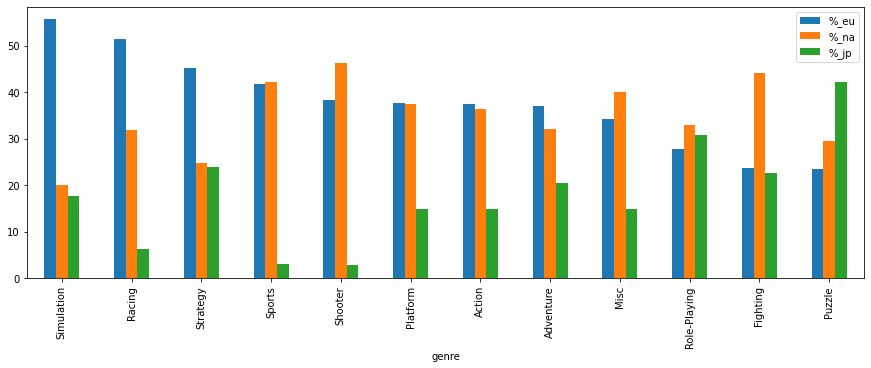

In [110]:
# отразим разницу в популярности жанров для разных рынков
popular_genre.plot(kind='bar', y=['%_eu', '%_na', '%_jp'], figsize=(15,5))
plt.show()

In [111]:
popular_genre

all_regions_sales  eu_sales  jp_sales  na_sales  %_eu  %_jp  \
genre                                                                       
Simulation                13.13      7.30      2.31      2.63  55.6  17.6   
Racing                    27.52     14.13      1.76      8.74  51.3   6.4   
Strategy                   3.96      1.79      0.95      0.98  45.2  24.0   
Sports                   109.48     45.73      3.26     46.13  41.8   3.0   
Shooter                  170.94     65.52      4.87     79.02  38.3   2.8   
Platform                  18.09      6.80      2.69      6.79  37.6  14.9   
Action                   199.36     74.68     29.58     72.53  37.5  14.8   
Adventure                 17.55      6.49      3.60      5.64  37.0  20.5   
Misc                      37.55     12.86      5.61     15.05  34.2  14.9   
Role-Playing             101.44     28.17     31.16     33.47  27.8  30.7   
Fighting                  28.22      6.69      6.37     12.43  23.7  22.6   
Puzzle                     2.21      0.52      0.93      0.65  23.5  42.1   

              %_na  
genre               
Simulation    20.0  
Racing        31.8  
Strategy      24.7  
Sports        42.1  
Shooter       46.2  
Platform      37.5  
Action        36.4  
Adventure     32.1  
Misc          40.1  
Role-Playing  33.0  
Fighting      44.0  
Puzzle        29.4

In [112]:
# вспомогательная таблица для анализа продаж na_sales
popular_genre_na = popular_genre.sort_values('na_sales', ascending=False)
popular_genre_na = popular_genre_na[['na_sales']].reset_index()
popular_genre_na.loc[(popular_genre_na['genre'] != popular_genre_na['genre'][0])\
                     &(popular_genre_na['genre'] != popular_genre_na['genre'][1])\
                     &(popular_genre_na['genre'] != popular_genre_na['genre'][2])\
                     &(popular_genre_na['genre'] != popular_genre_na['genre'][3])\
                     &(popular_genre_na['genre'] != popular_genre_na['genre'][4]),'genre'] = 'Other_genre'
popular_genre_na = popular_genre_na.pivot_table(index='genre', aggfunc='sum').sort_values('na_sales',ascending=False)
popular_genre_na

na_sales
genre                 
Shooter          79.02
Action           72.53
Sports           46.13
Other_genre      37.86
Role-Playing     33.47
Misc             15.05

In [113]:
# вспомогательная таблица для анализа продаж eu_sales
popular_genre_eu = popular_genre.sort_values('eu_sales', ascending=False)
popular_genre_eu = popular_genre_eu[['eu_sales']].reset_index()
popular_genre_eu.loc[(popular_genre_eu['genre'] != popular_genre_eu['genre'][0])\
                     &(popular_genre_eu['genre'] != popular_genre_eu['genre'][1])\
                     &(popular_genre_eu['genre'] != popular_genre_eu['genre'][2])\
                     &(popular_genre_eu['genre'] != popular_genre_eu['genre'][3])\
                     &(popular_genre_eu['genre'] != popular_genre_eu['genre'][4]),'genre'] = 'Other_genre'
popular_genre_eu = popular_genre_eu.pivot_table(index='genre', aggfunc='sum').sort_values('eu_sales',ascending=False)
popular_genre_eu

eu_sales
genre                 
Action           74.68
Shooter          65.52
Sports           45.73
Other_genre      42.45
Role-Playing     28.17
Racing           14.13

In [114]:
# вспомогательная таблица для анализа продаж jp_sales
popular_genre_jp = popular_genre.sort_values('jp_sales', ascending=False)
popular_genre_jp = popular_genre_jp[['jp_sales']].reset_index()
popular_genre_jp.loc[(popular_genre_jp['genre'] != popular_genre_jp['genre'][0])\
                     &(popular_genre_jp['genre'] != popular_genre_jp['genre'][1])\
                     &(popular_genre_jp['genre'] != popular_genre_jp['genre'][2])\
                     &(popular_genre_jp['genre'] != popular_genre_jp['genre'][3])\
                     &(popular_genre_jp['genre'] != popular_genre_jp['genre'][4]),'genre'] = 'Other_genre'
popular_genre_jp = popular_genre_jp.pivot_table(index='genre', aggfunc='sum').sort_values('jp_sales',ascending=False)
popular_genre_jp

jp_sales
genre                 
Role-Playing     31.16
Action           29.58
Other_genre      15.50
Fighting          6.37
Misc              5.61
Shooter           4.87

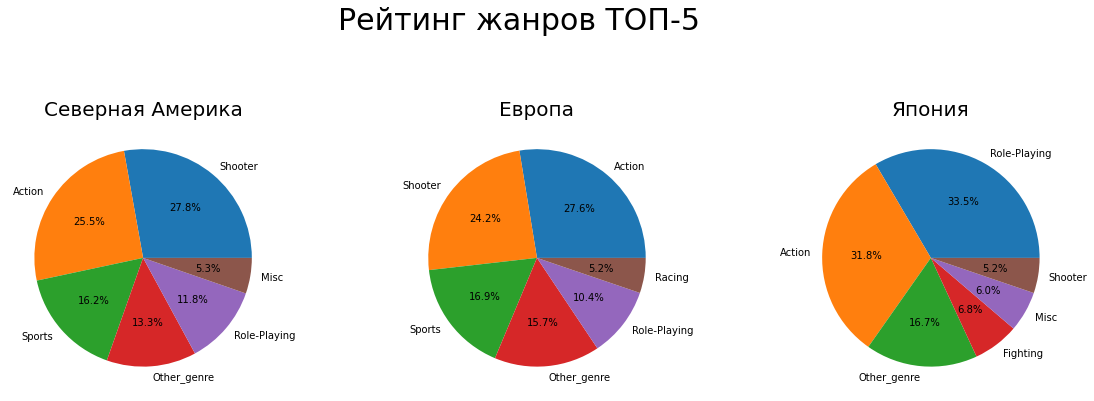

In [115]:
# Теперь построим ещё раз, но только ТОП-5 на трех креговых диаграммах стразу
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, subplot_kw={'aspect':'equal'}, figsize=(20,5))
fig.suptitle('Рейтинг жанров ТОП-5',
             y = 1.2,
             fontsize = 30)
labels = list(popular_genre_na.index)
ax1.pie(popular_genre_na['na_sales'], labels= labels, autopct='%1.1f%%')
ax1.set_title('Северная Америка', fontsize = 20)

labels = list(popular_genre_eu.index)
ax2.pie(popular_genre_eu['eu_sales'], labels= labels, autopct='%1.1f%%')
ax2.set_title('Европа', fontsize = 20)


labels = list(popular_genre_jp.index)
ax3.pie(popular_genre_jp['jp_sales'], labels= labels, autopct='%1.1f%%')
ax3.set_title('Япония', fontsize = 20)


plt.show()

В ТОП-5 у трёх локаци есть общие жанры Shooter, Action, Role-Playing, 

Общие для европы и америки в ТОП-5 только Sports. 
Racing в ТОП-5 характерен для европы, как для Японии Fighting.
Да, много жанров совпадают. Но в процентном соотношении разница во вкусах налицо.

Теперь посмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [116]:
# подготовим вспомогательную таблицу
rating_impact = \
actual_data.pivot_table\
        (index='rating', \
        values=['all_regions_sales', 'na_sales', 'eu_sales', 'jp_sales'],\
        aggfunc='sum')
rating_impact['%_eu'] = round(rating_impact['eu_sales'] / rating_impact['all_regions_sales']*100, 1)
rating_impact['%_jp'] = round(rating_impact['jp_sales'] / rating_impact['all_regions_sales']*100, 1)
rating_impact['%_na'] = round(rating_impact['na_sales'] / rating_impact['all_regions_sales']*100, 1)
rating_impact = rating_impact.sort_values('%_eu', ascending=False)

In [117]:
rating_impact

all_regions_sales  eu_sales  jp_sales  na_sales  %_eu  %_jp  %_na
rating                                                                      
E                     133.13     58.06      8.94     50.74  43.6   6.7  38.1
M                     226.54     93.44      8.01     96.42  41.2   3.5  42.6
E10+                   71.68     26.16      4.46     33.23  36.5   6.2  46.4
T                      99.13     34.07     14.78     38.95  34.4  14.9  39.3
no_rating             198.97     58.95     56.90     64.72  29.6  28.6  32.5

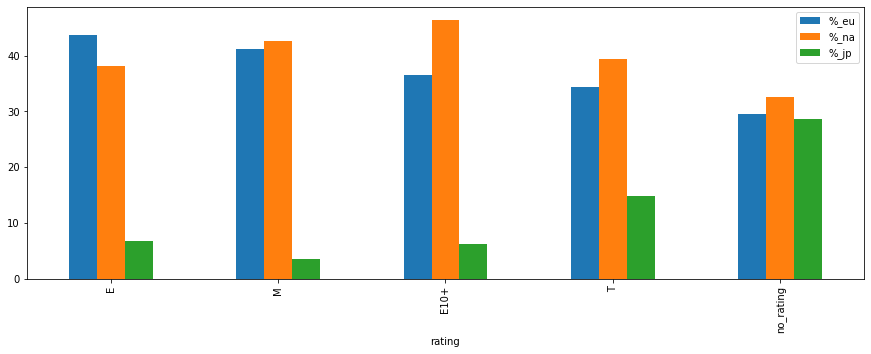

In [118]:
# отразим разницу в рейтингах для разных рынков
rating_impact.plot(kind='bar', y=['%_eu', '%_na', '%_jp'], figsize=(15,5))
plt.show()

Налицо разница в распределении продаж по рейтингам. Бросается в глаза присутствие рейтинга «RP» («Rating Pending») — «Рейтинг ожидается» только в европе. Это может быть связано с запретительными мерами продаж игр без рейтинга на американском и японском рынке. Также бросается в глаза большая ращница в продажаж европы и америки по рейтингу «EC» («Early childhood») — «Для детей младшего возраста». Складывается ощущение, что в европе не сертифицируют игры для маленьких детей. Это подозрительно. Распределение продаж по рейтингам на японском рынке сильно отличается и от европы и от америки.

если посмотреть в инете, что из себя представляет рейтинг ESRB, то окажется, что он предназначен для маркировки игр для США и Канады. И логично, что для других регионов он не заполняется. А в Японии есть свой рейтинг, свой рейтинг есть в ЕС и отдельно в Германии, Австралии и т.д., но по ним у нас нет данных. То есть, в данном случае пропуск имеет признак, что игра выпущена не в Северо-Американском регионе. Необходимо шире смотреть на исходный датасет, так как за цифрами находятся реальные бизнес-процессы. Мы должны это учитывать при предобработке данных.

### Проверка гипотез

Проверим гипотезу что Средние пользовательские рейтинги платформ Xbox One (XOne) и PC одинаковые

Сформулируем нулевую гипотезу, о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Эта гипотеза является двусторонней.
Соответственно альтернативная гипотеза обратна ей. Для проверки будем использовать данные из двух генеральных совокупностей. Массив данных по каждой из платформ. Для оценки будем использовать критерий  двустороннее значение p-value - вероятность совпадения рейтингов. 

H_0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H_a: Средние пользовательские рейтинги платформ Xbox One и PC НЕ одинаковые

alpha = 0.05

In [119]:
actual_data['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

In [120]:
# Загрузим библиотеку stats
from scipy import stats as st

In [121]:
# для корректной оценки необходимо также исключить пропуски user_score с заглушкой < 0
user_score_xone = actual_data.loc[(actual_data['platform'] == 'XOne')&(actual_data['user_score']>=0), 'user_score']
user_score_pc = actual_data.loc[(actual_data['platform'] == 'PC') &(actual_data['user_score']>=0), 'user_score']

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что отфильтровали заглушки.</font>

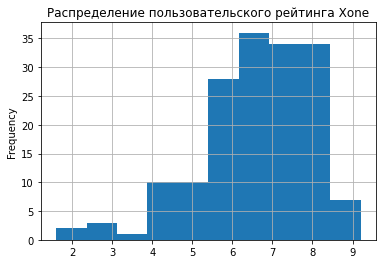

In [122]:
user_score_xone.plot(kind='hist', bins=10, title='Распределение пользовательского рейтинга Xone', grid=True)

plt.show()

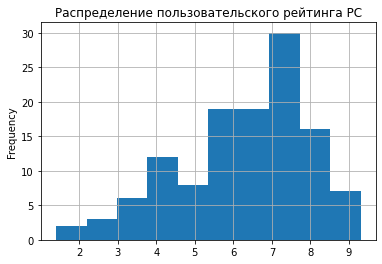

In [123]:
user_score_pc.plot(kind='hist', bins=10, title='Распределение пользовательского рейтинга PC', grid=True)

plt.show()

Оценки пользователей по заданным платформам имеют ассиметричные скошенные влево распределения

In [124]:
# Посмотрим дисперсию значений двух совокупностей 
print(np.var(user_score_xone), np.var(user_score_pc))

1.87954600550964 2.877374361730719


In [125]:
# Посмотрим стандариное отклонение значений двух совокупностей 
print(np.std(user_score_xone), np.std(user_score_pc))

1.370965355328004 1.6962825123577496


дисперсии выборок не равны, поэтому equal_var == False

In [126]:
# вызов метода для проверки гипотезы
results = st.ttest_ind(user_score_xone, user_score_pc, equal_var = False)
# значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Т.к.полученая вероятность совпадения значений больше критического уровня статистической значимости, который определен аналитиком экспертно.

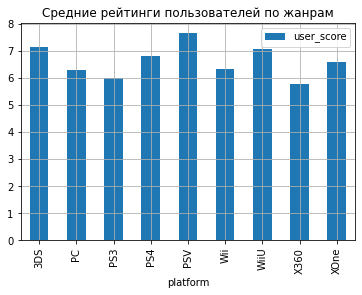

In [127]:
# построим столбчатую диаграмму средних рейтингов пользователей по платформам
actual_data.query('user_score >=0').pivot_table(index='platform', values='user_score').plot(kind='bar', grid=True, title='Средние рейтинги пользователей по жанрам')
plt.show()

Полученные на диаграмме значения не противоречат расчитанной вероятности.

Проверим гипотезу, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сформулируем нулевую гипотезу, о том, что средние пользовательские рейтинги жанров Action и Sports разные. Эта гипотеза является двусторонней.
Соответственно альтернативная гипотеза обратна ей. Для проверки будем использовать данные из двух генеральных совокупностей. Массив данных по каждому из жанров. Для оценки будем использовать критерий  двустороннее значение p-value - вероятность совпадения рейтингов. Нюанс в том, что при альтернативной гипотезе 
pvalue должна быть больше alpha. 

H_0: средние пользовательские рейтинги жанров Action и Sports разные

H_a: средние пользовательские рейтинги жанров Action и Sports одинаковые

alpha = 0.05


In [128]:
# для корректной оценки необходимо также исключить пропуски user_score с заглушкой < 0
user_score_action = actual_data.loc[(actual_data['genre'] == 'Action')&(actual_data['user_score']>=0), 'user_score']
user_score_sports = actual_data.loc[(actual_data['genre'] == 'Sports')&(actual_data['user_score']>=0), 'user_score']

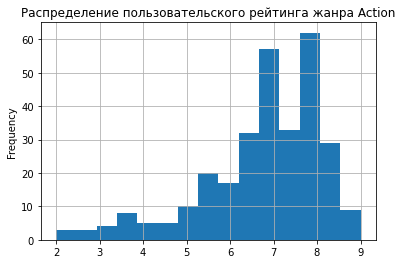

In [129]:
user_score_action.plot(kind='hist', bins=15, title='Распределение пользовательского рейтинга жанра Action', grid=True)
plt.show()

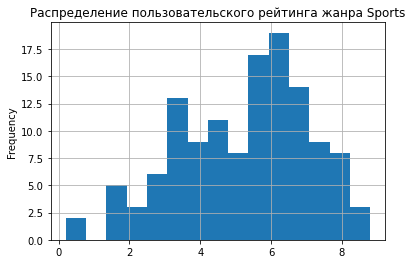

In [130]:
user_score_sports.plot(kind='hist', bins=15, title='Распределение пользовательского рейтинга жанра Sports', grid=True)
plt.show()

Оценки пользователей по заданным жанрам имеют ассиметричные скошенные влево нормальные распределения

In [131]:
print(user_score_action.var(), user_score_sports.var())

1.898476658476659 3.4469791276090476


дисперсии выборок не равны, поэтому equal_var == False

In [132]:
# вызов метода для проверки гипотезы
results = st.ttest_ind(user_score_action, user_score_sports, equal_var = False)
# значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue > alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.1825550382644557e-14
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные.Т.к.полученая вероятность совпадения значений меньше критического уровня статистической значимости, который определен аналитиком экспертно.

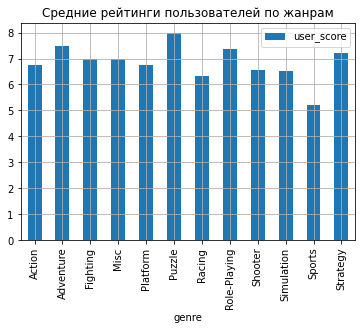

In [133]:
# построим столбчатую диаграмму средних рейтингов пользователей по жанрам
actual_data.query('user_score >=0').pivot_table(index='genre', values='user_score').plot(kind='bar', grid=True, title='Средние рейтинги пользователей по жанрам')
plt.show()

Полученные на диаграмме значения не противоречат расчитанной вероятности.

In [134]:
actual_data.head()

name platform  year_of_release  \
31                  Call of Duty: Black Ops 3      PS4             2015   
42                         Grand Theft Auto V      PS4             2014   
47  Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS             2014   
77                                    FIFA 16      PS4             2015   
87               Star Wars Battlefront (2015)      PS4             2015   

           genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
31       Shooter      6.03      5.86      0.36         2.38          -100   
42        Action      3.96      6.31      0.38         1.97            97   
47  Role-Playing      4.35      3.49      3.10         0.74          -100   
77        Sports      1.12      6.12      0.06         1.28            82   
87       Shooter      2.99      3.49      0.22         1.28          -100   

    user_score     rating  all_regions_sales  
31      -100.0  no_rating              14.63  
42         8.3          M              12.62  
47      -100.0  no_rating              11.68  
77         4.3          E               8.58  
87      -100.0  no_rating               7.98

### Общий вывод

В ходе исследования проанализирована статистика продаж международного интернет-магазина компьютерных игр.

Выявлены закономерности в данных, определяющие успешность игры. В дальнейшем, результаты исследования позволят сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В ходе проведенного исследования быди реализованы следующие этапы:

1. Загрузка данных и необходимых библиотек    
2. Подготовка данных
3. Исследовательский анализ данных
4. Портрет пользователя каждого региона
5. Проверка гипотез
5. Общий вывод

При подготовке данных, названия столбцов приведены к нижнему регистру. Преобразован тип данных некоторых полей, для оптимизации объема данных.  

Отработаны пропуски. Проведена проверка на дубликаты. Созданы необходимые дополнительные столбцы.

Проанализировано сколько игр выпускалось в разные годы. Пик выпуска приходится на 2008-2009 годы. С 2009 года идёт снижение количества выводимых релизов.

Сформирован ТОП-10 платформ по объемам продаж, Лидерами за всю историю наблюдений являются платформы PS2, X360, PS3

Проанализированы продажи ТОП-10 по годам

Интересно, что мы имеем большой разброс по количеству лет работы крупнейщих платформ. От года до 13 лет. Но медианный срок существования платформ 7 лет

Бросается в глаза самая долгоживущая из платформ - РС. Она входит в десятку крупнейших, хотя её ежегодные продажи не превышают 50 млн. копий. Для других ТОП-10 платформ характерен резкий рост в течение 3-5 лет, плато 2-4 лет, далее резкое падение

Построен график динамики рынка по годам

Начиная с 1996 года можно отметить начало периода ощутимого роста рынка. Это связано с приходом крупной платформы PS - первой за всю историю платфлрмы, продажи которой на пике в 1998 году превысили 150 млн. копий. Вместе с тем, начиная с 2009 года, можно отметить начало периода падения рынка. Возможно это связано с ростом популярности соцсетей или с иной причиной.

Для прогнозирования продаж 2017 года берем самые актуальные данные за последние 3 года т.е. с 2014-го, остальное не берем.

В ходе исследования проанализирована прибыльность платформ

Очевидно, что несколько крупных платформ PS3, X360, 3DC, Wii, Ds находятся в конечной стадии жизненного цикла. 
А многие платформы PSP, PC, PSV падают долго, медленно, но перспективными их явно не назовешь. 

Вместе с тем, на графике видны две потенциально-перспективные платформы XOne и PS4. Они появились в 2013 году, 
и два года подряд показвают значительный рост.

Не смотря на падение рынка в 2016 году платформы PS4 и XOne занимают бОльшую долю рынка. Для планированя продаж 2017 года эти платформы наиболее перспективны

Данные **платформы PS4 и XOne рассмотрим данные платформы с точки зрени локаций.**
В рамках выбранных платформ, на американском рынке определенно стоит обратить внимание на жанры Shooter,Action, Sports. На рынке Европы лидируют сегменты Action, Shooter, Sports.

А если уж выходить на японский рынок в 2017 году то, только в сегмент жанр Role-Playing платформа 3DS, или жанр Action тойже платформы.

Построен график «ящик с усами» по глобальным в разбивке по платформам. 

Условно платформы разбили на крупные средние и мелкие, и пострили ящики с усами для каждой группы в отдельности, чтобы визуально было удобно оценить редультат

Бросается в глаза наличие практически одинаковых параметров у некоторых платформ. Так например медиана, квартили Q1 и Q3, а также размеры усов PS4 и XOne почти идентичны. Аналогичная ситуация по PS3 и X360. Такая идентичность может указывать на то, что платформы являются прямыми конкурентами, играют на одних и тех же территориальных рынках и имеют схожие продажи.

Далее проанализировано влияние отзывов на продажи на платформе PS4.
Анализ не выявил сильной зависимости продаж от каких либо отзывов. 

При анализе платформ из ТОП-10. Вывод об отсутствии зависимости подтверждается. Анализ не выявил сильной зависимости продаж от каких либо отзывов. Этот факт необходимо учитывать при бланировании рекламных компаний в предстоящем году.

Проанализировано распределение игр по жанрам. По глобальным продажам есть три жанра-лидера Action, Sports, Shooter. Зависимость от оценок, как было определено выше, не прослеживается. Для более детального анализа построена разбивка каждого жанра по рейтингу.


В разбивке по рейтингу тройка лидеров Action, Sports, Shooter. сохраняется. Жанры Shooter и Action имеют максимальные продажи в более популярном рейтинге «M» («Mature») — «Для взрослых». Для Sports характерен рейтинг «E» («Everyone») - «Для всех»

Медианные значения на диаграммах размаха подтверждают вывод о лидерстве жанров Shooter, Sports и Platform. Т.е. это стабильные жанры, которые приносят доход не зависимо от платформы, значит на эти жанры есть устойчивый спрос!

В рамках исследования создан портрет пользователя по каждому региону

На европейском рынке платформы распределены относительно равномерно, что говорит о высокой конкуренции и стабильном спросе

БОльшую долю в продажах в Японии занимают исключительно национальные платформы, которые продаются полностью или преимущественно в Японии (PSP, PSV, 3DS).  Платформы WiiU, PS3 популярны одинаково как в Японии так и в других странах и имеют на Японском рынке долю от 15 до 20%.


На северо-американском рынке платформы распределены ещё более равномерно чем даже в европе, что говорит о самой высокой конкуренции, а также о стабильном спросе

Проанализированы ТОП-5 жанров для каждого региона
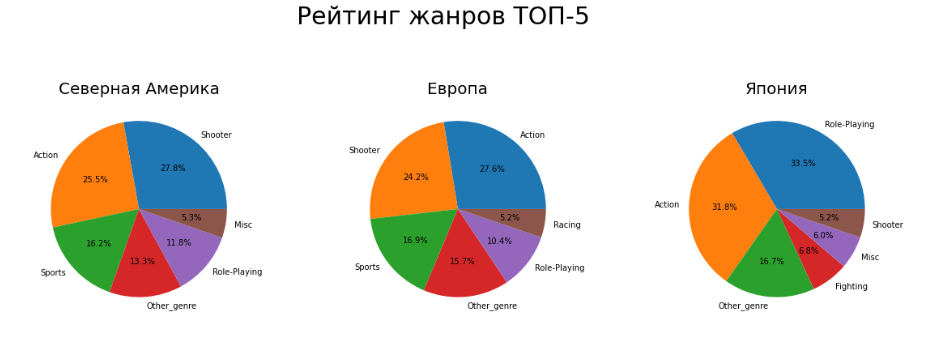

В ТОП-5 у трёх локаци есть общие жанры Shooter, Action, Role-Playing, 

Общие для европы и америки в ТОП-5 только Sports. 
Racing в ТОП-5 характерен для европы, как для Японии Fighting.
Да, много жанров совпадают. Но в процентном соотношении разница во вкусах налицо.

Проанализировано влияение рейтинга ESRB на продажи в отдельном регионе. Построен график рейтингов для разных рынков

Налицо разница в распределении продаж по рейтингам. Бросается в глаза присутствие рейтинга «RP» («Rating Pending») — «Рейтинг ожидается» только в европе. Это может быть связано с запретительными мерами продаж игр без рейтинга на американском и японском рынке. Также бросается в глаза большая ращница в продажаж европы и америки по рейтингу «EC» («Early childhood») — «Для детей младшего возраста». Складывается ощущение, что в европе не сертифицируют игры для маленьких детей. Это подозрительно. Распределение продаж по рейтингам на японском рынке сильно отличается и от европы и от америки.

В рамках исследования проведена проверка основных гипотез

Сформулирована нулевая гипотеза, о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Эта гипотеза является двусторонней. Соответственно альтернативная гипотеза обратна ей. Для проверки использованы данные из двух выборок (оценок пользователей по каждой из платформ Xbox One и PC) Для оценки использован метод ttest_ind() который рассчитывает вероятность совпадения средних значений p-value. Дисперсии выборок не равны, поэтому параметр равной дисперсии equal_var == False

В итоге, не получилось отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Т.к.полученая вероятность совпадения значений больше критического уровня статистической значимости, который определен аналитиком экспертно.

Также проверена гипотеза, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Для оценки использован метод ttest_ind() который рассчитывает вероятность совпадения средних значений p-value. Дисперсии выборок не равны, поэтому параметр равной дисперсии equal_var == False

Не получилось отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные.Т.к.полученая вероятность совпадения значений меньше критического уровня статистической значимости, который определен аналитиком экспертно.

Таким образом проведенное исследование позволило определить перспективные рынки, сегменты и локации для планирования продаж и продвижения в 2017 году, а также обосновать предложенный выбор.